In [2]:
#Importing required Libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
import pickle

In [3]:
#Loading unclean dataset
dataset = pd.read_csv("uncleaned_dataset.csv")

In [4]:
#Dataset head
dataset.head(10)

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,26 Mcveigh Street,Singleton,459000.0,NaN,2.0,2.0,810.0,182.0,NaN,55500.0,Mandurah Station,9400.0,04-2016,6175,-32.443160,115.757170,COMET BAY COLLEGE,3.091502,35.0
1,262 York Street,Subiaco,1085000.0,2.0,1.0,1.0,406.0,108.0,1900.0,3100.0,Subiaco Station,254.0,03-2020,6008,-31.946030,115.826430,PERTH MODERN SCHOOL,0.946706,1.0
2,15A Maritana Road,Kallaroo,465000.0,3.0,1.0,2.0,1066.0,NaN,1976.0,20800.0,Whitfords Station,NaN,06-2016,6025,-31.789940,115.749430,ST MARK'S ANGLICAN COMMUNITY SCHOOL,1.134980,58.0
3,63 Unnaro Street,Hillman,248000.0,3.0,1.0,1.0,699.0,79.0,1970.0,37800.0,Rockingham Station,950.0,03-2009,6168,-32.282580,115.765910,KOLBE CATHOLIC COLLEGE,1.159382,97.0
4,25 James Gilmour Way,Darch,325000.0,4.0,2.0,2.0,564.0,NaN,2006.0,14800.0,Greenwood Station,5500.0,08-2015,6065,-31.820450,115.841220,ASHDALE SECONDARY COLLEGE,0.982198,75.0
5,3 Hurstford Close,Peppermint Grove,2225000.0,4.0,1.0,2.0,751.0,225.0,NaN,10100.0,Cottesloe Station,469.0,12-2014,6011,-31.997089,115.765882,PRESBYTERIAN LADIES COLLEGE,0.399721,11.0
6,8 Hindmarsh Way,Edgewater,605000.0,4.0,2.0,2.0,687.0,183.0,2001.0,23300.0,Edgewater Station,2000.0,03-2019,6027,-31.754180,115.778820,MATER DEI COLLEGE,1.185859,104.0
7,13 Bedford Road,Ardross,1375000.0,4.0,2.0,2.0,475.0,147.0,1958.0,8400.0,Canning Bridge Station,2300.0,08-2016,6153,-32.026430,115.842360,APPLECROSS SENIOR HIGH SCHOOL,0.759846,34.0
8,84 Pilkington Circus,Beechboro,375000.0,3.0,1.0,4.0,665.0,115.0,NaN,13200.0,Success Hill Station,4000.0,12-2016,6063,-31.864380,115.952280,KIARA COLLEGE,2.178751,NaN
9,30 Saw Drive,Darlington,710000.0,3.0,2.0,2.0,2398.0,223.0,1988.0,20200.0,Midland Station,6700.0,05-2015,6070,-31.912070,116.067160,TREETOPS MONTESSORI SCHOOL,1.108077,NaN


In [5]:
#Dataset description
dataset.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,3.183000e+04,32088.000000,32347.000000,30258.000000,32089.000000,32241.000000,28838.000000,31831.000000,32116.000000,34656.000000,34656.000000,34656.000000,31829.000000,23372.000000
mean,6.386045e+05,3.659686,1.821715,2.198890,2775.828165,183.609069,1989.701713,19771.956646,4526.946070,6089.395054,-31.960709,115.879238,1.820424,72.642478
std,3.574004e+05,0.751180,0.587511,1.342065,17156.466005,72.098019,20.980908,11353.457646,4478.388187,62.187035,0.177736,0.118184,1.754575,40.642704
min,5.100000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000,681.000000,46.000000,6003.000000,-32.472979,115.582730,0.070912,1.000000
25%,4.100000e+05,3.000000,1.000000,2.000000,504.000000,130.000000,1978.000000,11200.000000,1800.000000,6050.000000,-32.068516,115.789607,0.883725,39.000000
50%,5.375000e+05,4.000000,2.000000,2.000000,683.000000,172.000000,1995.000000,17500.000000,3200.000000,6069.000000,-31.933609,115.854078,1.347528,68.000000
75%,7.650000e+05,4.000000,2.000000,2.000000,840.000000,223.000000,2005.000000,26600.000000,5300.000000,6149.000000,-31.843970,115.970762,2.100266,105.000000
max,2.440000e+06,10.000000,16.000000,99.000000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.457450,116.343201,23.254372,139.000000


In [6]:
#Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34656 entries, 0 to 34655
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ADDRESS           34656 non-null  object 
 1   SUBURB            34656 non-null  object 
 2   PRICE             31830 non-null  float64
 3   BEDROOMS          32088 non-null  float64
 4   BATHROOMS         32347 non-null  float64
 5   GARAGE            30258 non-null  float64
 6   LAND_AREA         32089 non-null  float64
 7   FLOOR_AREA        32241 non-null  float64
 8   BUILD_YEAR        28838 non-null  float64
 9   CBD_DIST          31831 non-null  float64
 10  NEAREST_STN       34656 non-null  object 
 11  NEAREST_STN_DIST  32116 non-null  float64
 12  DATE_SOLD         34656 non-null  object 
 13  POSTCODE          34656 non-null  int64  
 14  LATITUDE          34656 non-null  float64
 15  LONGITUDE         34656 non-null  float64
 16  NEAREST_SCH       34656 non-null  object

In [7]:
dataset.shape

(34656, 19)

In [8]:
#Null value counts
dataset.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                2826
BEDROOMS             2568
BATHROOMS            2309
GARAGE               4398
LAND_AREA            2567
FLOOR_AREA           2415
BUILD_YEAR           5818
CBD_DIST             2825
NEAREST_STN             0
NEAREST_STN_DIST     2540
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST     2827
NEAREST_SCH_RANK    11284
dtype: int64

# Cleaning the Dataset

# Step 1(Cleaning) - Dropping duplicate rows

In [9]:
dataset.drop_duplicates(['ADDRESS', 'SUBURB', 'LATITUDE', 'LONGITUDE'], inplace = True)
dataset

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,26 Mcveigh Street,Singleton,459000.0,NaN,2.0,2.0,810.0,182.0,NaN,55500.0,Mandurah Station,9400.0,04-2016,6175,-32.443160,115.757170,COMET BAY COLLEGE,3.091502,35.0
1,262 York Street,Subiaco,1085000.0,2.0,1.0,1.0,406.0,108.0,1900.0,3100.0,Subiaco Station,254.0,03-2020,6008,-31.946030,115.826430,PERTH MODERN SCHOOL,0.946706,1.0
2,15A Maritana Road,Kallaroo,465000.0,3.0,1.0,2.0,1066.0,NaN,1976.0,20800.0,Whitfords Station,NaN,06-2016,6025,-31.789940,115.749430,ST MARK'S ANGLICAN COMMUNITY SCHOOL,1.134980,58.0
3,63 Unnaro Street,Hillman,248000.0,3.0,1.0,1.0,699.0,79.0,1970.0,37800.0,Rockingham Station,950.0,03-2009,6168,-32.282580,115.765910,KOLBE CATHOLIC COLLEGE,1.159382,97.0
4,25 James Gilmour Way,Darch,325000.0,4.0,2.0,2.0,564.0,NaN,2006.0,14800.0,Greenwood Station,5500.0,08-2015,6065,-31.820450,115.841220,ASHDALE SECONDARY COLLEGE,0.982198,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,16 Jingana Road,Banksia Grove,345000.0,3.0,2.0,1.0,300.0,117.0,2010.0,28600.0,Clarkson Station,6100.0,06-2017,6031,-31.700286,115.801334,JOSEPH BANKS SECONDARY COLLEGE,0.483366,92.0
34652,3 Hitchcock Street,St James,575000.0,3.0,1.0,1.0,765.0,147.0,1981.0,7000.0,Welshpool Station,1900.0,12-2018,6102,-32.001890,115.904800,CANNING COLLEGE,1.108131,NaN
34653,16 Badrick Street,Warwick,680000.0,4.0,2.0,1.0,721.0,200.0,1971.0,NaN,Warwick Station,745.0,07-2015,6024,-31.844430,115.804220,WARWICK SENIOR HIGH SCHOOL,1.237553,NaN
34654,11a Hayburn Street,Scarborough,817500.0,3.0,2.0,2.0,354.0,228.0,2002.0,9800.0,Stirling Station,3100.0,10-2019,6019,-31.902381,115.773237,INTERNATIONAL SCHOOL OF WESTERN AUSTRALIA,0.598028,NaN


# Step 2(Cleaning) - Dropping columns which are not required

In [10]:
dataset.drop(columns = ['ADDRESS', 'SUBURB', 'NEAREST_STN', 'NEAREST_SCH', 'NEAREST_SCH_RANK'], inplace = True)
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST
0,459000.0,NaN,2.0,2.0,810.0,182.0,NaN,55500.0,9400.0,04-2016,6175,-32.443160,115.757170,3.091502
1,1085000.0,2.0,1.0,1.0,406.0,108.0,1900.0,3100.0,254.0,03-2020,6008,-31.946030,115.826430,0.946706
2,465000.0,3.0,1.0,2.0,1066.0,NaN,1976.0,20800.0,NaN,06-2016,6025,-31.789940,115.749430,1.134980
3,248000.0,3.0,1.0,1.0,699.0,79.0,1970.0,37800.0,950.0,03-2009,6168,-32.282580,115.765910,1.159382
4,325000.0,4.0,2.0,2.0,564.0,NaN,2006.0,14800.0,5500.0,08-2015,6065,-31.820450,115.841220,0.982198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,345000.0,3.0,2.0,1.0,300.0,117.0,2010.0,28600.0,6100.0,06-2017,6031,-31.700286,115.801334,0.483366
34652,575000.0,3.0,1.0,1.0,765.0,147.0,1981.0,7000.0,1900.0,12-2018,6102,-32.001890,115.904800,1.108131
34653,680000.0,4.0,2.0,1.0,721.0,200.0,1971.0,NaN,745.0,07-2015,6024,-31.844430,115.804220,1.237553
34654,817500.0,3.0,2.0,2.0,354.0,228.0,2002.0,9800.0,3100.0,10-2019,6019,-31.902381,115.773237,0.598028


# Step 3(Cleaning) - Taking year from DATE_SOLD column as BUILD_YEAR column only contains year

In [11]:
dataset['SOLD_YEAR'] = pd.to_datetime(dataset['DATE_SOLD']).dt.year
dataset.drop(columns = ['DATE_SOLD'], inplace = True)
dataset

/var/folders/7m/qgxc2c_11vqg3j9h1f7zlk_40000gn/T/ipykernel_40269/3083960264.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dataset['SOLD_YEAR'] = pd.to_datetime(dataset['DATE_SOLD']).dt.year


,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
0,459000.0,NaN,2.0,2.0,810.0,182.0,NaN,55500.0,9400.0,6175,-32.443160,115.757170,3.091502,2016
1,1085000.0,2.0,1.0,1.0,406.0,108.0,1900.0,3100.0,254.0,6008,-31.946030,115.826430,0.946706,2020
2,465000.0,3.0,1.0,2.0,1066.0,NaN,1976.0,20800.0,NaN,6025,-31.789940,115.749430,1.134980,2016
3,248000.0,3.0,1.0,1.0,699.0,79.0,1970.0,37800.0,950.0,6168,-32.282580,115.765910,1.159382,2009
4,325000.0,4.0,2.0,2.0,564.0,NaN,2006.0,14800.0,5500.0,6065,-31.820450,115.841220,0.982198,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,345000.0,3.0,2.0,1.0,300.0,117.0,2010.0,28600.0,6100.0,6031,-31.700286,115.801334,0.483366,2017
34652,575000.0,3.0,1.0,1.0,765.0,147.0,1981.0,7000.0,1900.0,6102,-32.001890,115.904800,1.108131,2018
34653,680000.0,4.0,2.0,1.0,721.0,200.0,1971.0,NaN,745.0,6024,-31.844430,115.804220,1.237553,2015
34654,817500.0,3.0,2.0,2.0,354.0,228.0,2002.0,9800.0,3100.0,6019,-31.902381,115.773237,0.598028,2019


# Step 4(Cleaning) - Filling missing values

In [12]:
#Filling NA values in columns PRICE, BEDROOMS, BATHROOMS, LAND_AREA AND FLOOR_AREA using KNN

In [13]:
missing_values = ['PRICE', 'BEDROOMS', 'BATHROOMS', 'LAND_AREA', 'FLOOR_AREA']
imputer = KNNImputer(n_neighbors = 7)
imputed_dataset = imputer.fit_transform(dataset[missing_values])
dataset[missing_values] = imputed_dataset
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
0,459000.0,4.142857,2.0,2.0,810.0,182.000000,NaN,55500.0,9400.0,6175,-32.443160,115.757170,3.091502,2016
1,1085000.0,2.000000,1.0,1.0,406.0,108.000000,1900.0,3100.0,254.0,6008,-31.946030,115.826430,0.946706,2020
2,465000.0,3.000000,1.0,2.0,1066.0,154.857143,1976.0,20800.0,NaN,6025,-31.789940,115.749430,1.134980,2016
3,248000.0,3.000000,1.0,1.0,699.0,79.000000,1970.0,37800.0,950.0,6168,-32.282580,115.765910,1.159382,2009
4,325000.0,4.000000,2.0,2.0,564.0,176.857143,2006.0,14800.0,5500.0,6065,-31.820450,115.841220,0.982198,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,345000.0,3.000000,2.0,1.0,300.0,117.000000,2010.0,28600.0,6100.0,6031,-31.700286,115.801334,0.483366,2017
34652,575000.0,3.000000,1.0,1.0,765.0,147.000000,1981.0,7000.0,1900.0,6102,-32.001890,115.904800,1.108131,2018
34653,680000.0,4.000000,2.0,1.0,721.0,200.000000,1971.0,NaN,745.0,6024,-31.844430,115.804220,1.237553,2015
34654,817500.0,3.000000,2.0,2.0,354.0,228.000000,2002.0,9800.0,3100.0,6019,-31.902381,115.773237,0.598028,2019


In [14]:
#Filling NA values of GARAGE column with mode

In [15]:
dataset['GARAGE'].fillna(dataset['GARAGE'].mode()[0], inplace = True)

In [16]:
#Filling NA column values for CBD_DIST using LATITUDE AND LONGITUDE by KNN

In [17]:
missing_values = ['CBD_DIST', 'LATITUDE', 'LONGITUDE']
imputed_dataset = imputer.fit_transform(dataset[missing_values])
dataset[missing_values] = imputed_dataset
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
0,459000.0,4.142857,2.0,2.0,810.0,182.000000,NaN,55500.0,9400.0,6175,-32.443160,115.757170,3.091502,2016
1,1085000.0,2.000000,1.0,1.0,406.0,108.000000,1900.0,3100.0,254.0,6008,-31.946030,115.826430,0.946706,2020
2,465000.0,3.000000,1.0,2.0,1066.0,154.857143,1976.0,20800.0,NaN,6025,-31.789940,115.749430,1.134980,2016
3,248000.0,3.000000,1.0,1.0,699.0,79.000000,1970.0,37800.0,950.0,6168,-32.282580,115.765910,1.159382,2009
4,325000.0,4.000000,2.0,2.0,564.0,176.857143,2006.0,14800.0,5500.0,6065,-31.820450,115.841220,0.982198,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,345000.0,3.000000,2.0,1.0,300.0,117.000000,2010.0,28600.0,6100.0,6031,-31.700286,115.801334,0.483366,2017
34652,575000.0,3.000000,1.0,1.0,765.0,147.000000,1981.0,7000.0,1900.0,6102,-32.001890,115.904800,1.108131,2018
34653,680000.0,4.000000,2.0,1.0,721.0,200.000000,1971.0,13100.0,745.0,6024,-31.844430,115.804220,1.237553,2015
34654,817500.0,3.000000,2.0,2.0,354.0,228.000000,2002.0,9800.0,3100.0,6019,-31.902381,115.773237,0.598028,2019


In [18]:
#Filling NA column values for NEAREST_STN_DIST using LATITUDE AND LONGITUDE by KNN

In [19]:
missing_values = ['NEAREST_STN_DIST', 'LATITUDE', 'LONGITUDE']
imputed_dataset = imputer.fit_transform(dataset[missing_values])
dataset[missing_values] = imputed_dataset
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
0,459000.0,4.142857,2.0,2.0,810.0,182.000000,NaN,55500.0,9400.000000,6175,-32.443160,115.757170,3.091502,2016
1,1085000.0,2.000000,1.0,1.0,406.0,108.000000,1900.0,3100.0,254.000000,6008,-31.946030,115.826430,0.946706,2020
2,465000.0,3.000000,1.0,2.0,1066.0,154.857143,1976.0,20800.0,3314.285714,6025,-31.789940,115.749430,1.134980,2016
3,248000.0,3.000000,1.0,1.0,699.0,79.000000,1970.0,37800.0,950.000000,6168,-32.282580,115.765910,1.159382,2009
4,325000.0,4.000000,2.0,2.0,564.0,176.857143,2006.0,14800.0,5500.000000,6065,-31.820450,115.841220,0.982198,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,345000.0,3.000000,2.0,1.0,300.0,117.000000,2010.0,28600.0,6100.000000,6031,-31.700286,115.801334,0.483366,2017
34652,575000.0,3.000000,1.0,1.0,765.0,147.000000,1981.0,7000.0,1900.000000,6102,-32.001890,115.904800,1.108131,2018
34653,680000.0,4.000000,2.0,1.0,721.0,200.000000,1971.0,13100.0,745.000000,6024,-31.844430,115.804220,1.237553,2015
34654,817500.0,3.000000,2.0,2.0,354.0,228.000000,2002.0,9800.0,3100.000000,6019,-31.902381,115.773237,0.598028,2019


In [20]:
#Filling NA column values for NEAREST_SCH_DIST using LATITUDE AND LONGITUDE by KNN

In [21]:
missing_values = ['NEAREST_SCH_DIST', 'LATITUDE', 'LONGITUDE']
imputed_dataset = imputer.fit_transform(dataset[missing_values])
dataset[missing_values] = imputed_dataset
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
0,459000.0,4.142857,2.0,2.0,810.0,182.000000,NaN,55500.0,9400.000000,6175,-32.443160,115.757170,3.091502,2016
1,1085000.0,2.000000,1.0,1.0,406.0,108.000000,1900.0,3100.0,254.000000,6008,-31.946030,115.826430,0.946706,2020
2,465000.0,3.000000,1.0,2.0,1066.0,154.857143,1976.0,20800.0,3314.285714,6025,-31.789940,115.749430,1.134980,2016
3,248000.0,3.000000,1.0,1.0,699.0,79.000000,1970.0,37800.0,950.000000,6168,-32.282580,115.765910,1.159382,2009
4,325000.0,4.000000,2.0,2.0,564.0,176.857143,2006.0,14800.0,5500.000000,6065,-31.820450,115.841220,0.982198,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34651,345000.0,3.000000,2.0,1.0,300.0,117.000000,2010.0,28600.0,6100.000000,6031,-31.700286,115.801334,0.483366,2017
34652,575000.0,3.000000,1.0,1.0,765.0,147.000000,1981.0,7000.0,1900.000000,6102,-32.001890,115.904800,1.108131,2018
34653,680000.0,4.000000,2.0,1.0,721.0,200.000000,1971.0,13100.0,745.000000,6024,-31.844430,115.804220,1.237553,2015
34654,817500.0,3.000000,2.0,2.0,354.0,228.000000,2002.0,9800.0,3100.000000,6019,-31.902381,115.773237,0.598028,2019


# Step 5(Cleaning) - Tranforming imputted values of BEDROOMS and BATHROOMS to floor values.

In [22]:
dataset['BEDROOMS'] = (dataset['BEDROOMS'].astype(float)).apply(np.floor)
dataset['BATHROOMS'] = (dataset['BATHROOMS'].astype(float)).apply(np.floor)

# Step 6(Cleaning) - Dropping NA values

In [23]:
dataset.dropna(inplace = True)

In [24]:
dataset.shape

(28010, 14)

# Step 7(Cleaning) - Adding PRICE_CATEGORY column

In [25]:
dataset.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
count,2.801000e+04,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000,28010.000000
mean,6.389020e+05,3.627704,1.778650,2.174830,2636.021421,182.896797,1989.703035,19606.489233,4458.412215,6088.731382,-31.959925,115.878831,1.782357,2016.650446
std,3.470528e+05,0.742985,0.595772,1.287938,17000.530903,70.157437,20.984468,11286.430858,4404.169756,61.029763,0.176183,0.117617,1.693623,3.482012
min,5.200000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1870.000000,681.000000,46.000000,6003.000000,-32.472979,115.583610,0.070912,1988.000000
25%,4.150000e+05,3.000000,1.000000,2.000000,512.000000,131.000000,1978.000000,11100.000000,1800.000000,6050.000000,-32.066195,115.789558,0.874112,2015.000000
50%,5.488571e+05,4.000000,2.000000,2.000000,687.000000,173.000000,1995.000000,17300.000000,3200.000000,6069.000000,-31.932668,115.853554,1.331048,2017.000000
75%,7.600000e+05,4.000000,2.000000,2.000000,870.000000,220.000000,2005.000000,26300.000000,5300.000000,6149.000000,-31.843390,115.969988,2.062227,2019.000000
max,2.440000e+06,10.000000,7.000000,99.000000,999999.000000,849.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.465818,116.341780,23.254372,2020.000000


In [26]:
#Price < 25% considered to be low, Price >= 25% and < 75% considered to be medium and price > 75% considered to be high
dataset.loc[dataset["PRICE"]<415000, "PRICE_CATEGORY"] = "LOW"
dataset.loc[(dataset["PRICE"]>=415000) & (dataset["PRICE"]<755000), "PRICE_CATEGORY"] = "MEDIUM"
dataset.loc[dataset["PRICE"]>=755000, "PRICE_CATEGORY"] = "HIGH"
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR,PRICE_CATEGORY
1,1085000.0,2.0,1.0,1.0,406.0,108.000000,1900.0,3100.0,254.000000,6008,-31.946030,115.826430,0.946706,2020,HIGH
2,465000.0,3.0,1.0,2.0,1066.0,154.857143,1976.0,20800.0,3314.285714,6025,-31.789940,115.749430,1.134980,2016,MEDIUM
3,248000.0,3.0,1.0,1.0,699.0,79.000000,1970.0,37800.0,950.000000,6168,-32.282580,115.765910,1.159382,2009,LOW
4,325000.0,4.0,2.0,2.0,564.0,176.857143,2006.0,14800.0,5500.000000,6065,-31.820450,115.841220,0.982198,2015,LOW
6,605000.0,4.0,2.0,2.0,687.0,183.000000,2001.0,23300.0,2000.000000,6027,-31.754180,115.778820,1.185859,2019,MEDIUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34649,575000.0,3.0,2.0,2.0,2001.0,178.000000,1995.0,27400.0,13400.000000,6072,-31.900350,116.142070,3.611917,2011,MEDIUM
34651,345000.0,3.0,2.0,1.0,300.0,117.000000,2010.0,28600.0,6100.000000,6031,-31.700286,115.801334,0.483366,2017,LOW
34652,575000.0,3.0,1.0,1.0,765.0,147.000000,1981.0,7000.0,1900.000000,6102,-32.001890,115.904800,1.108131,2018,MEDIUM
34653,680000.0,4.0,2.0,1.0,721.0,200.000000,1971.0,13100.0,745.000000,6024,-31.844430,115.804220,1.237553,2015,MEDIUM


# Step 8(Cleaning) - Adding one hot encoding for PRICE_CATEGORY Column

In [27]:
dataset = pd.get_dummies(dataset, columns=["PRICE_CATEGORY"])
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR,PRICE_CATEGORY_HIGH,PRICE_CATEGORY_LOW,PRICE_CATEGORY_MEDIUM
1,1085000.0,2.0,1.0,1.0,406.0,108.000000,1900.0,3100.0,254.000000,6008,-31.946030,115.826430,0.946706,2020,True,False,False
2,465000.0,3.0,1.0,2.0,1066.0,154.857143,1976.0,20800.0,3314.285714,6025,-31.789940,115.749430,1.134980,2016,False,False,True
3,248000.0,3.0,1.0,1.0,699.0,79.000000,1970.0,37800.0,950.000000,6168,-32.282580,115.765910,1.159382,2009,False,True,False
4,325000.0,4.0,2.0,2.0,564.0,176.857143,2006.0,14800.0,5500.000000,6065,-31.820450,115.841220,0.982198,2015,False,True,False
6,605000.0,4.0,2.0,2.0,687.0,183.000000,2001.0,23300.0,2000.000000,6027,-31.754180,115.778820,1.185859,2019,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34649,575000.0,3.0,2.0,2.0,2001.0,178.000000,1995.0,27400.0,13400.000000,6072,-31.900350,116.142070,3.611917,2011,False,False,True
34651,345000.0,3.0,2.0,1.0,300.0,117.000000,2010.0,28600.0,6100.000000,6031,-31.700286,115.801334,0.483366,2017,False,True,False
34652,575000.0,3.0,1.0,1.0,765.0,147.000000,1981.0,7000.0,1900.000000,6102,-32.001890,115.904800,1.108131,2018,False,False,True
34653,680000.0,4.0,2.0,1.0,721.0,200.000000,1971.0,13100.0,745.000000,6024,-31.844430,115.804220,1.237553,2015,False,False,True


# Step 9(Cleaning) - Changing datatype of BUILD_YEAR for the ease of visualization and convention

In [28]:
dataset['BUILD_YEAR'] = dataset['BUILD_YEAR'].astype(int)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28010 entries, 1 to 34654
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PRICE                  28010 non-null  float64
 1   BEDROOMS               28010 non-null  float64
 2   BATHROOMS              28010 non-null  float64
 3   GARAGE                 28010 non-null  float64
 4   LAND_AREA              28010 non-null  float64
 5   FLOOR_AREA             28010 non-null  float64
 6   BUILD_YEAR             28010 non-null  int64  
 7   CBD_DIST               28010 non-null  float64
 8   NEAREST_STN_DIST       28010 non-null  float64
 9   POSTCODE               28010 non-null  int64  
 10  LATITUDE               28010 non-null  float64
 11  LONGITUDE              28010 non-null  float64
 12  NEAREST_SCH_DIST       28010 non-null  float64
 13  SOLD_YEAR              28010 non-null  int32  
 14  PRICE_CATEGORY_HIGH    28010 non-null  bool   
 15  PRICE_C

# Applying EDA Techniques
# Step 1(EDA) - Checking for outliers in each column combined with cleaning the outliers (Step - 10 of cleaning)

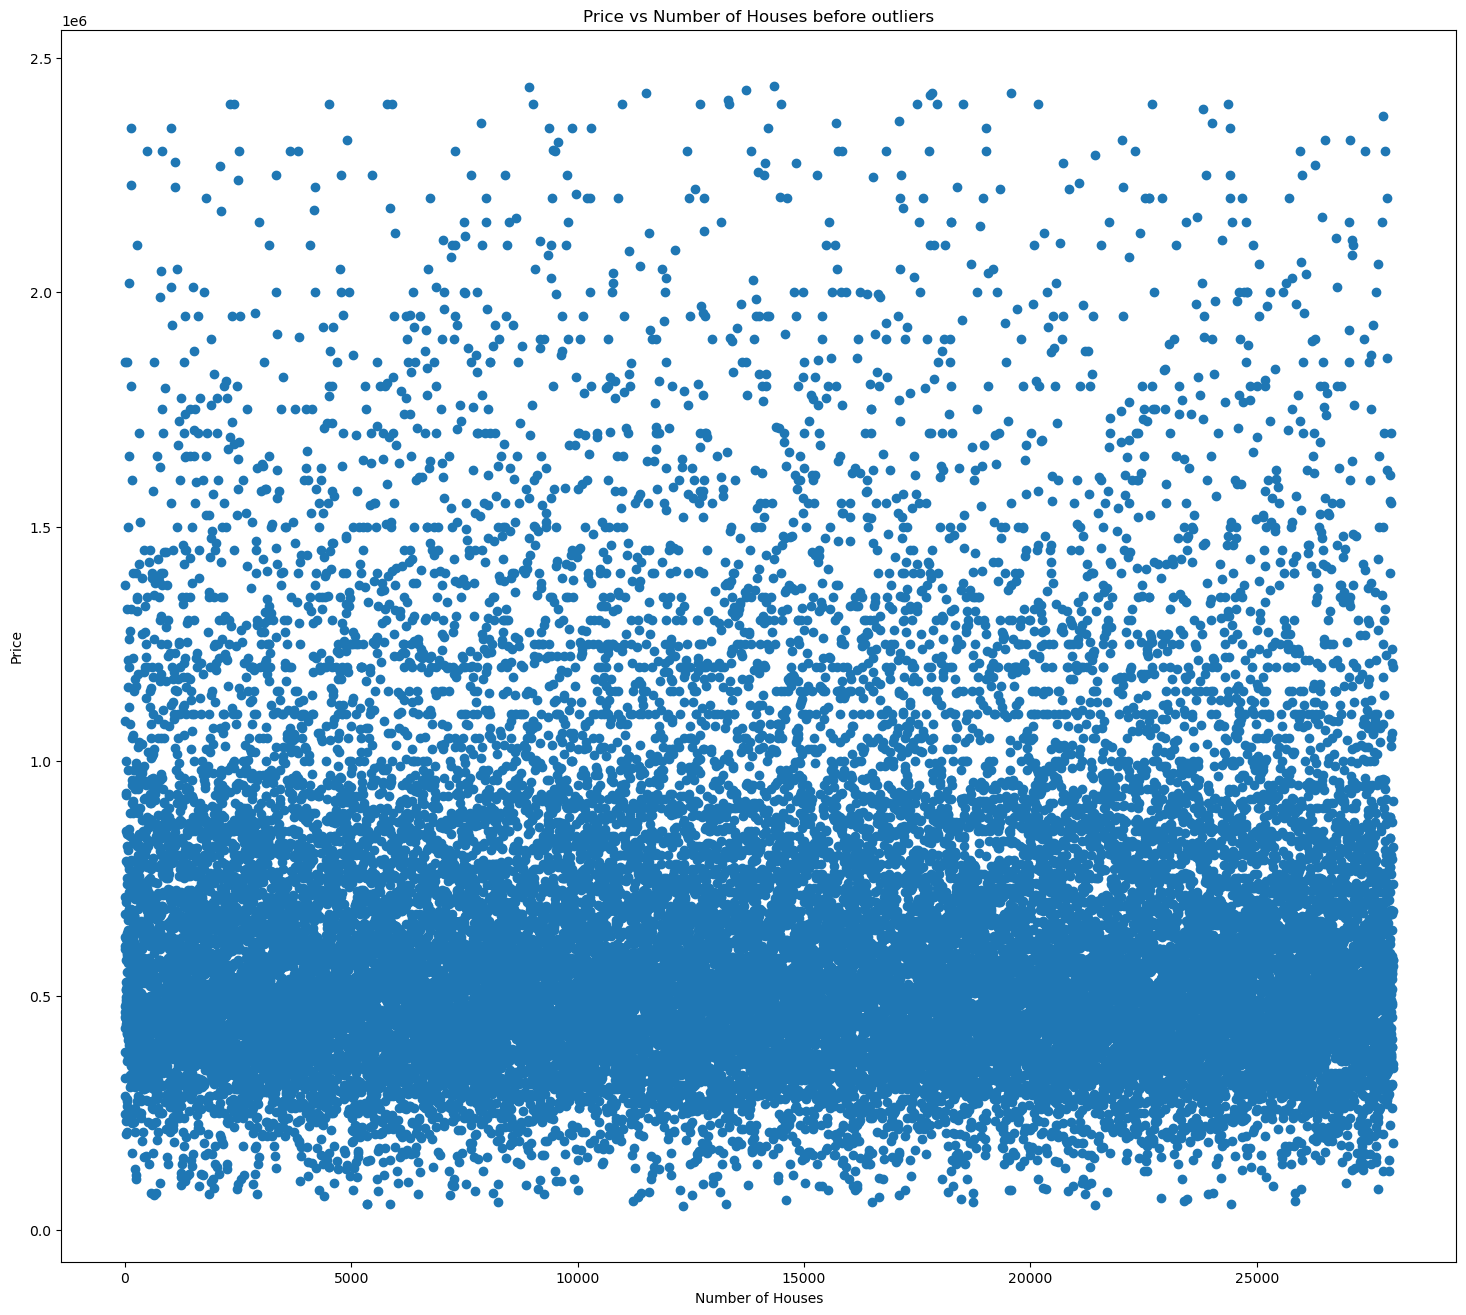

In [29]:
#Detecting Outliers of PRICE column using scatter plot

plt.figure(figsize=(18, 16))

plt.scatter(range(dataset.shape[0]),dataset['PRICE'])

plt.title('Price vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Price')

plt.show()

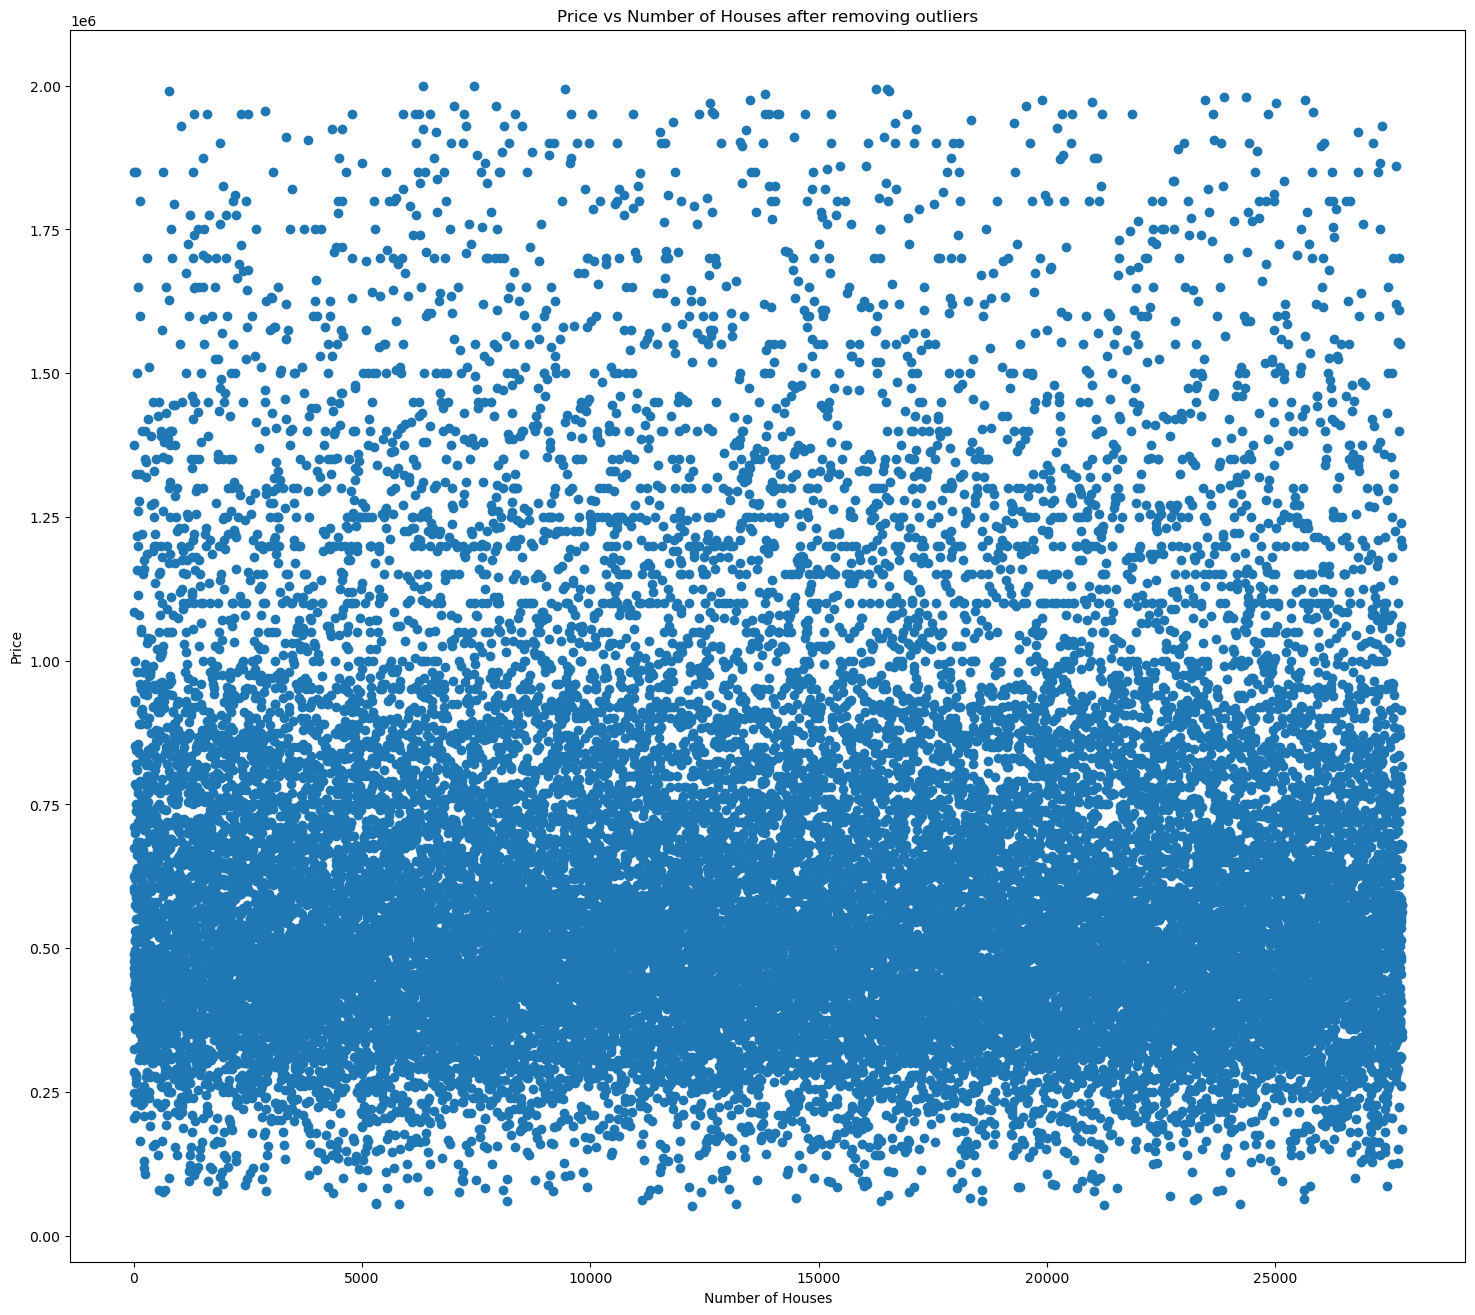

In [30]:
#Removing outliers for PRICE
dataset.drop(dataset[dataset['PRICE'] >= 2e6].index, inplace = True) 

plt.figure(figsize=(18, 16))

plt.scatter(range(dataset.shape[0]),dataset['PRICE'])

plt.title('Price vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Price')

plt.show()

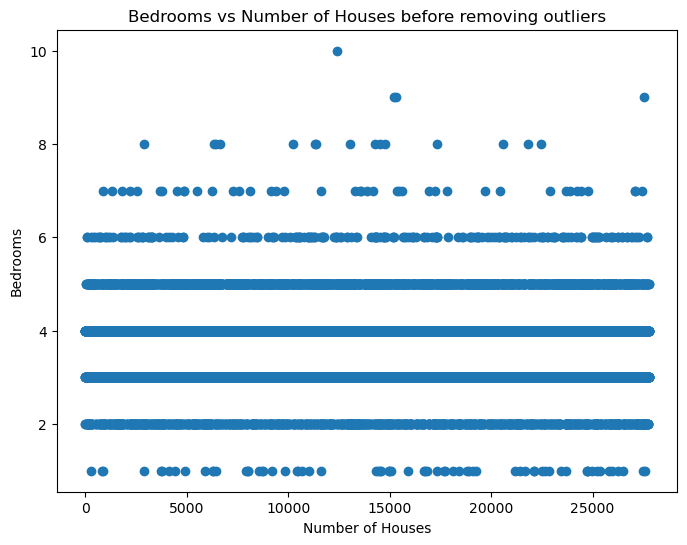

In [31]:
#Detecting Outliers of BEDROOMS column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['BEDROOMS'])

plt.title('Bedrooms vs Number of Houses before removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Bedrooms')

plt.show()

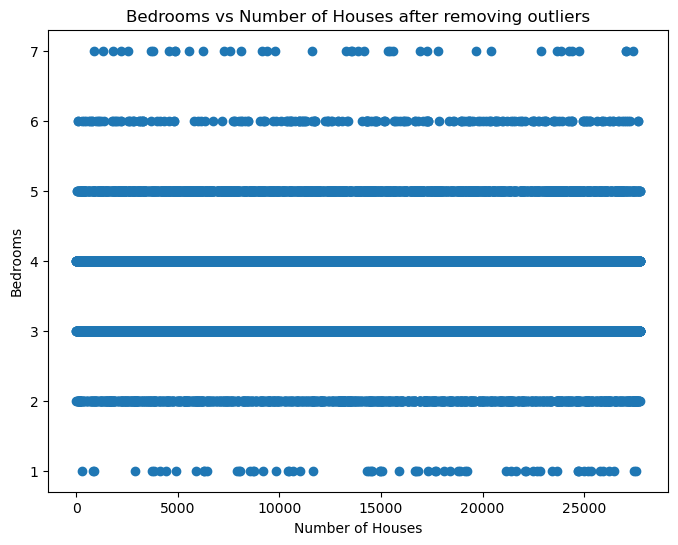

In [32]:
#Removing outliers for BEDROOMS
dataset.drop(dataset[dataset['BEDROOMS'] > 7].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['BEDROOMS'])

plt.title('Bedrooms vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Bedrooms')

plt.show()

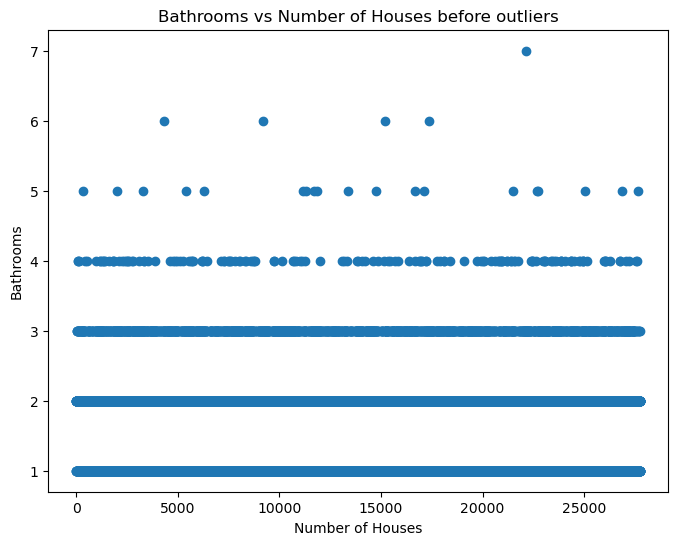

In [33]:
#Detecting Outliers of BATHROOMS column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['BATHROOMS'])


plt.title('Bathrooms vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Bathrooms')

plt.show()

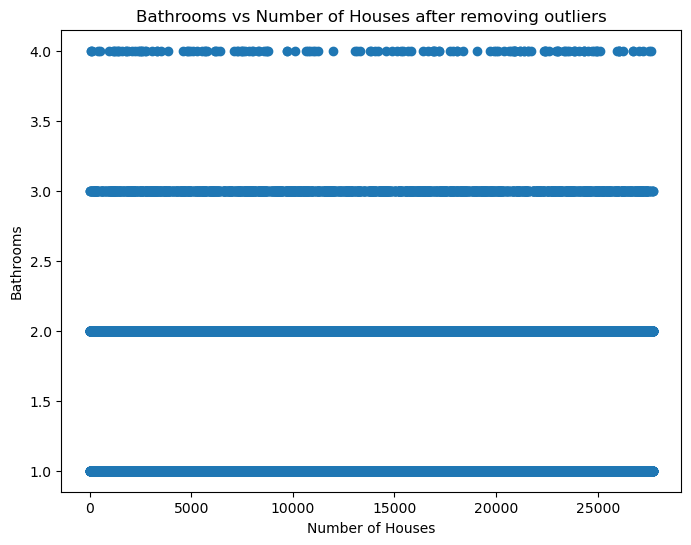

In [34]:
#Removing outliers for BATHROOMS
dataset.drop(dataset[dataset['BATHROOMS'] > 4.5].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['BATHROOMS'])

plt.title('Bathrooms vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Bathrooms')

plt.show()

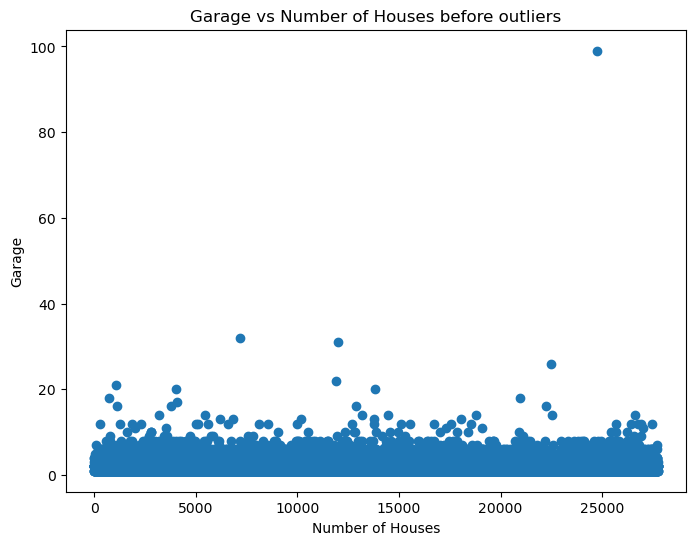

In [35]:
#Detecting Outliers of GARAGE column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['GARAGE'])

plt.title('Garage vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Garage')

plt.show()

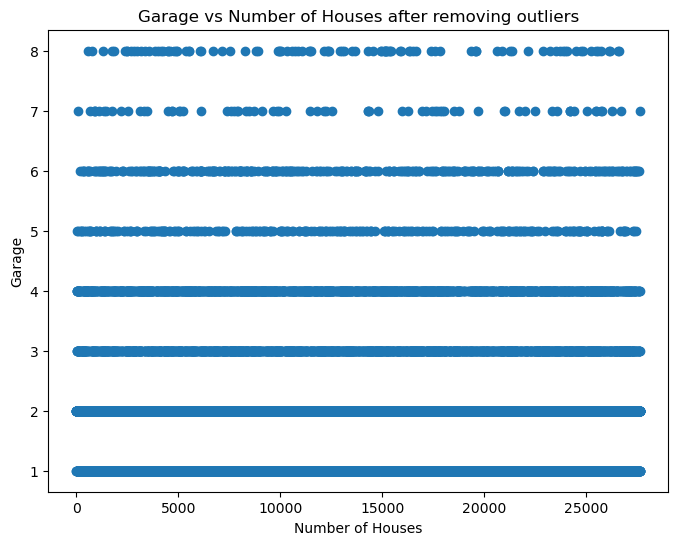

In [36]:
#Removing outliers for GARAGE
dataset.drop(dataset[dataset['GARAGE'] > 8].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['GARAGE'])

plt.title('Garage vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Garage')

plt.show()

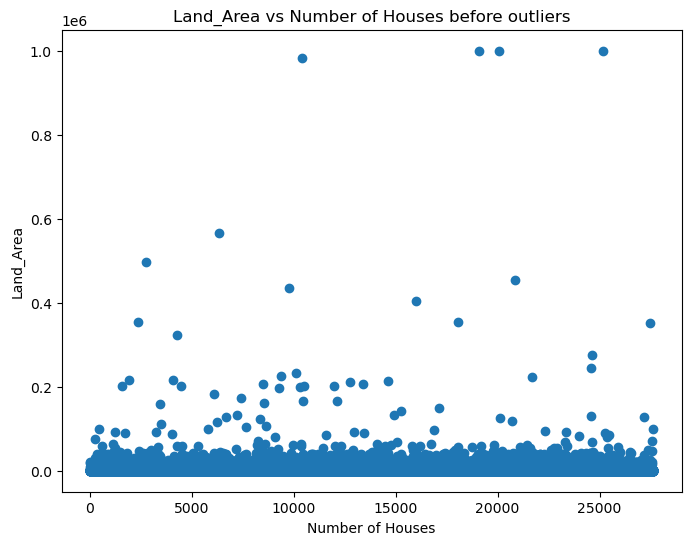

In [37]:
#Detecting Outliers of LAND_AREA column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['LAND_AREA'])

plt.title('Land_Area vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Land_Area')

plt.show()

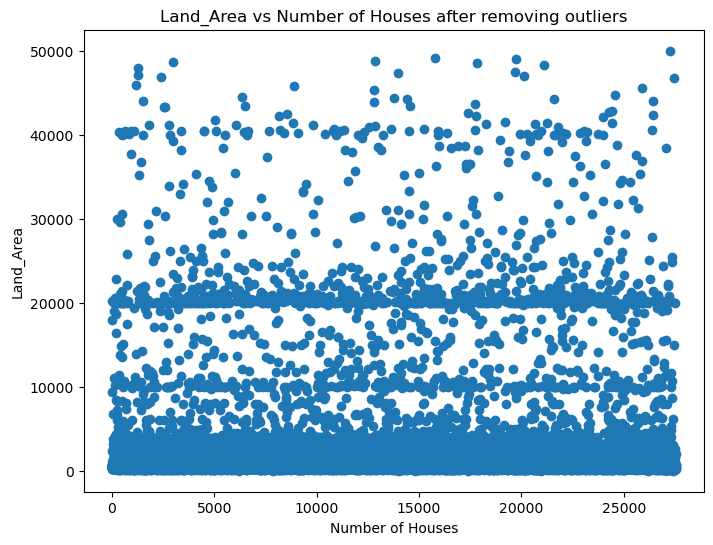

In [38]:
#Removing outliers for LAND_AREA
dataset.drop(dataset[dataset['LAND_AREA'] > 50000].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['LAND_AREA'])

plt.title('Land_Area vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Land_Area')

plt.show()

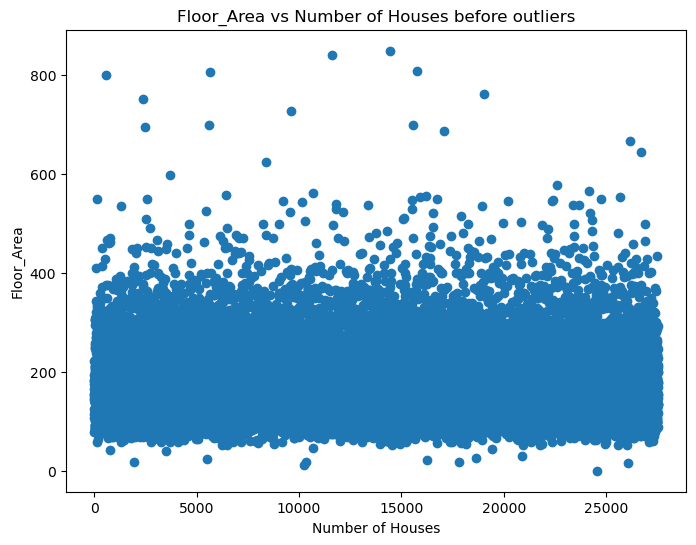

In [39]:
#Detecting Outliers of FLOOR_AREA column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['FLOOR_AREA'])

plt.title('Floor_Area vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Floor_Area')

plt.show()

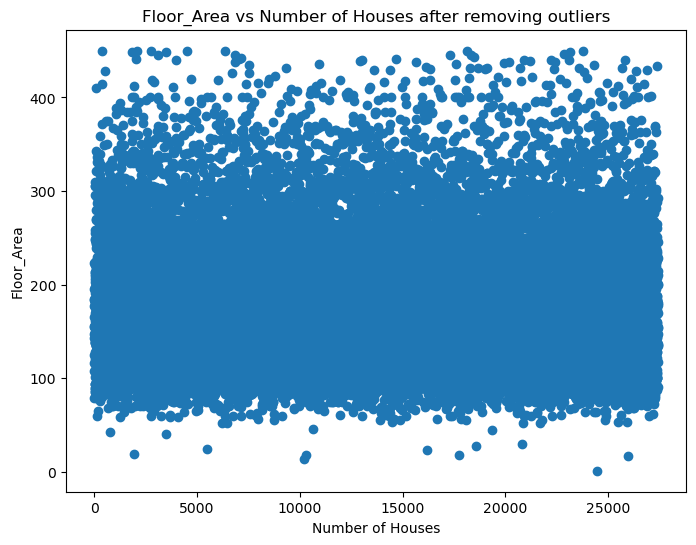

In [40]:
#Removing outliers for FLOOR_AREA
dataset.drop(dataset[dataset['FLOOR_AREA'] > 450].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['FLOOR_AREA'])

plt.title('Floor_Area vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Floor_Area')

plt.show()

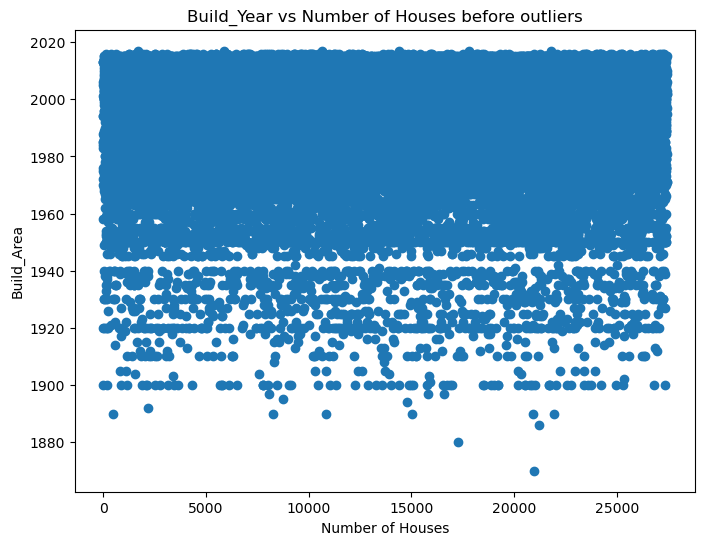

In [41]:
#Detecting Outliers of BUILD_YEAR column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['BUILD_YEAR'])

plt.title('Build_Year vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Build_Area')


plt.show()

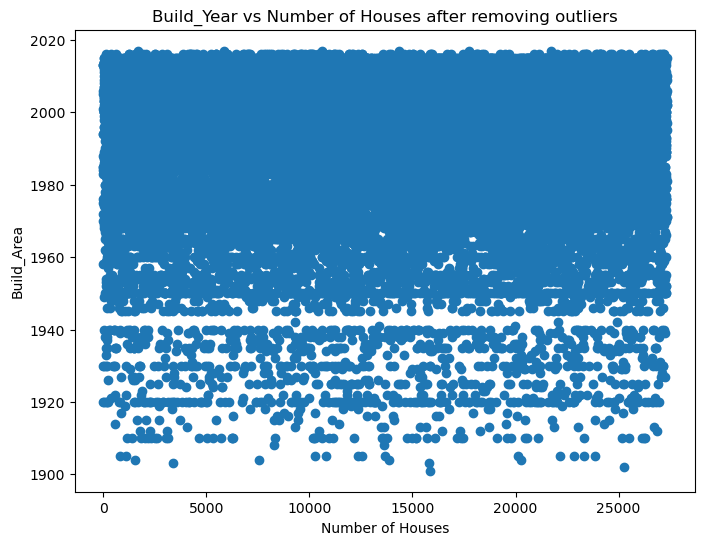

In [42]:
#Removing outliers for BUILD_YEAR
dataset.drop(dataset[dataset['BUILD_YEAR'] <= 1900].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['BUILD_YEAR'])

plt.title('Build_Year vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('Build_Area')

plt.show()

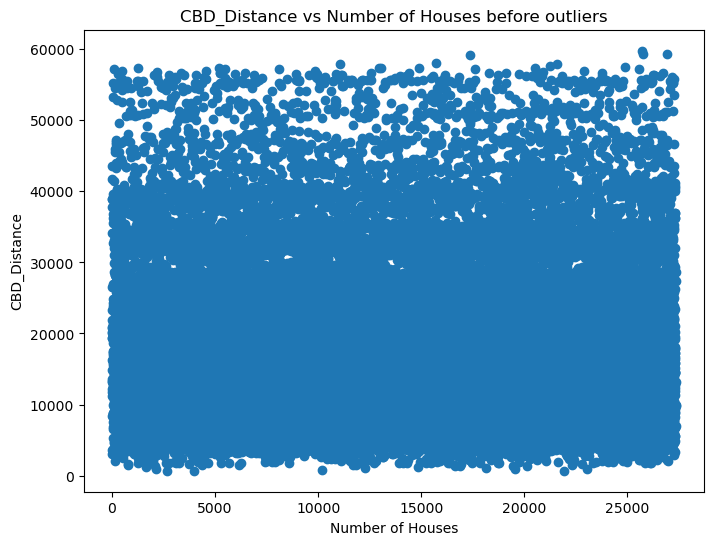

In [43]:
#Detecting Outliers of CBD_DIST column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['CBD_DIST'])

plt.title('CBD_Distance vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('CBD_Distance')

plt.show()

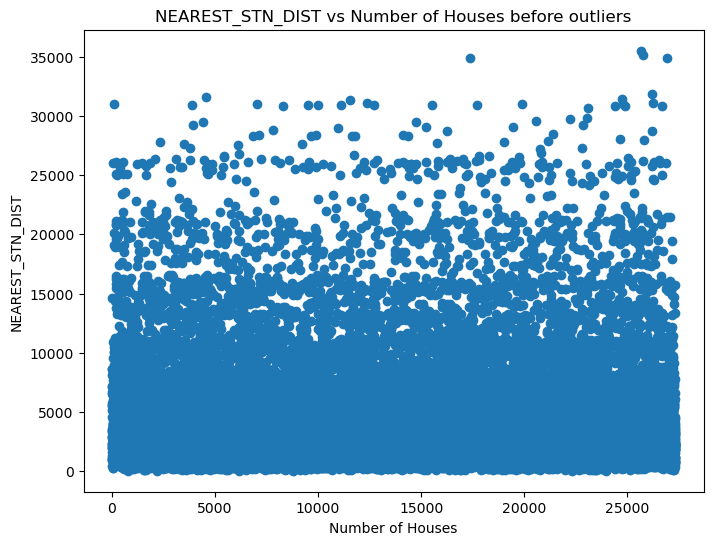

In [44]:
#Detecting Outliers of NEAREST_STN_DIST column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['NEAREST_STN_DIST'])

plt.title('NEAREST_STN_DIST vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('NEAREST_STN_DIST')

plt.show()

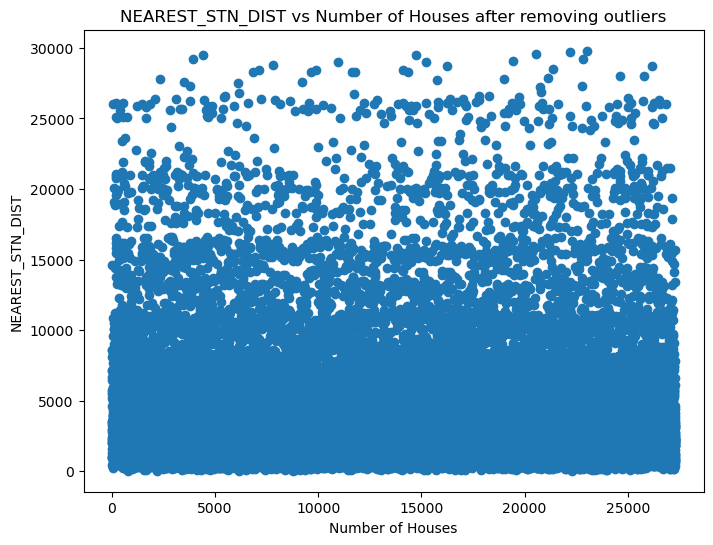

In [45]:
#Removing outliers for NEAREST_STN_DIST
dataset.drop(dataset[dataset['NEAREST_STN_DIST'] >= 30000].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['NEAREST_STN_DIST'])

plt.title('NEAREST_STN_DIST vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('NEAREST_STN_DIST')

plt.show()

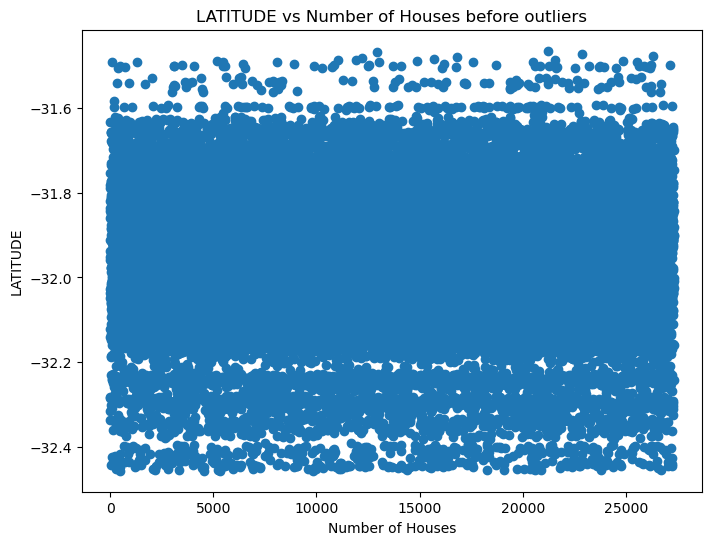

In [46]:
#Detecting Outliers of LATITUDE column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['LATITUDE'])

plt.title('LATITUDE vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('LATITUDE')

plt.show()

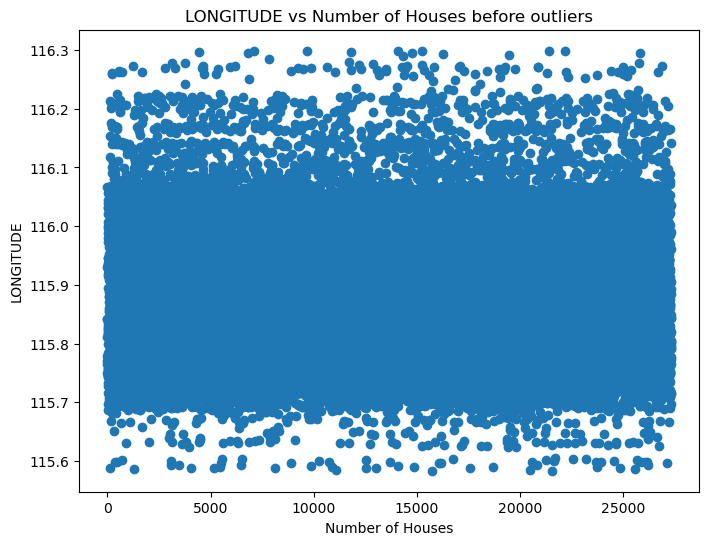

In [47]:
#Detecting Outliers of LONGITUDE column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['LONGITUDE'])

plt.title('LONGITUDE vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('LONGITUDE')

plt.show()

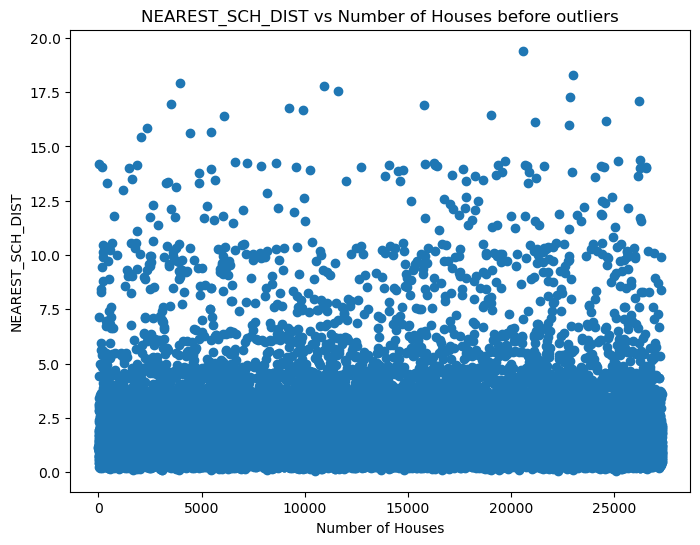

In [48]:
#Detecting Outliers of NEAREST_SCH_DIST column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['NEAREST_SCH_DIST'])

plt.title('NEAREST_SCH_DIST vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('NEAREST_SCH_DIST')


plt.show()

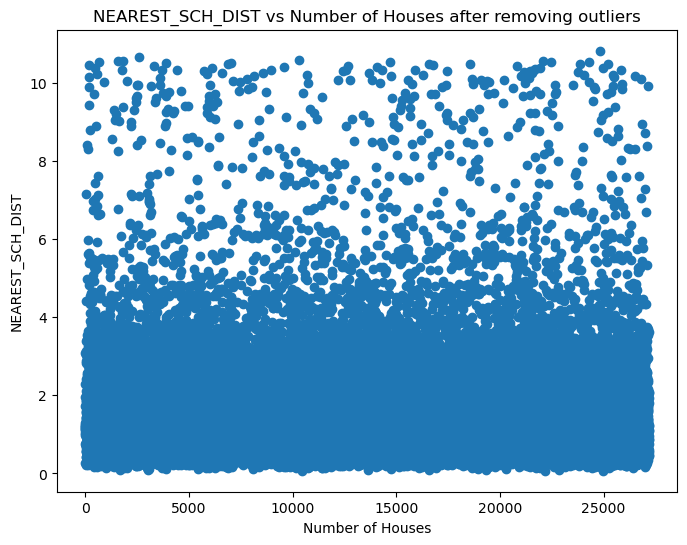

In [49]:
#Removing outliers for NEAREST_SCH_DIST
dataset.drop(dataset[dataset['NEAREST_SCH_DIST'] >= 11].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['NEAREST_SCH_DIST'])

plt.title('NEAREST_SCH_DIST vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('NEAREST_SCH_DIST')

plt.show()

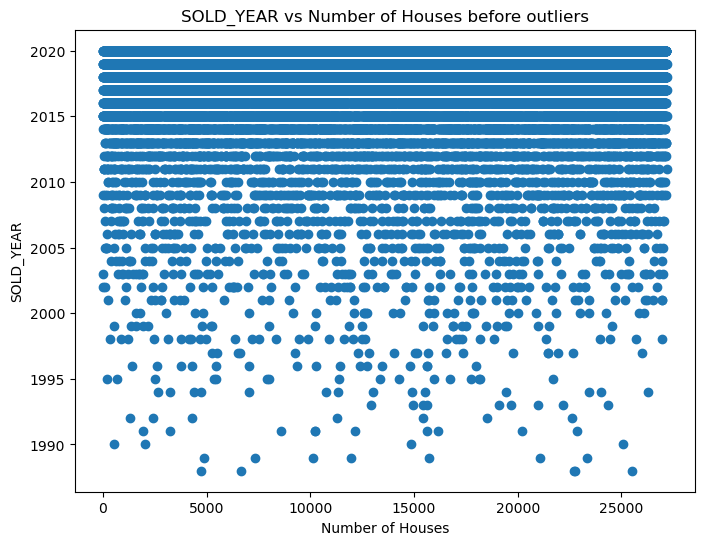

In [50]:
#Detecting Outliers of SOLD_YEAR column using scatter plot

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['SOLD_YEAR'])

plt.title('SOLD_YEAR vs Number of Houses before outliers')
plt.xlabel('Number of Houses')
plt.ylabel('SOLD_YEAR')

plt.show()

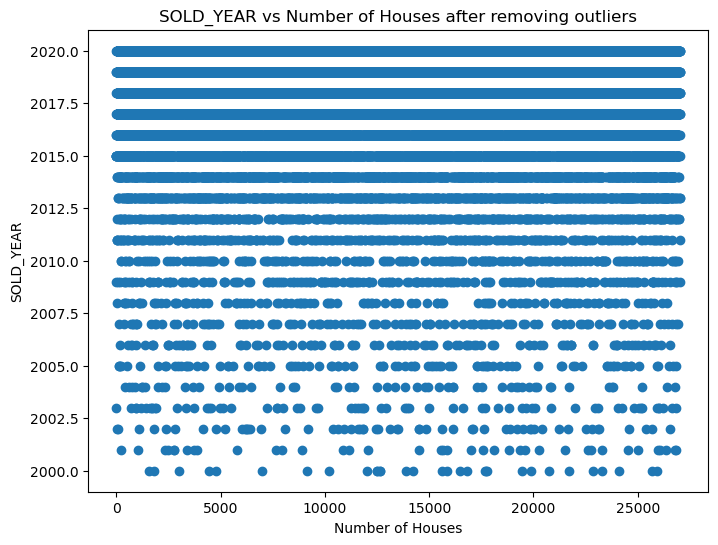

In [51]:
#Removing outliers for SOLD_YEAR
dataset.drop(dataset[dataset['SOLD_YEAR'] < 2000].index, inplace = True) 

plt.figure(figsize=(8, 6))

plt.scatter(range(dataset.shape[0]),dataset['SOLD_YEAR'])

plt.title('SOLD_YEAR vs Number of Houses after removing outliers')
plt.xlabel('Number of Houses')
plt.ylabel('SOLD_YEAR')

plt.show()

In [52]:
dataset 

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR,PRICE_CATEGORY_HIGH,PRICE_CATEGORY_LOW,PRICE_CATEGORY_MEDIUM
2,465000.0,3.0,1.0,2.0,1066.0,154.857143,1976,20800.0,3314.285714,6025,-31.789940,115.749430,1.134980,2016,False,False,True
3,248000.0,3.0,1.0,1.0,699.0,79.000000,1970,37800.0,950.000000,6168,-32.282580,115.765910,1.159382,2009,False,True,False
4,325000.0,4.0,2.0,2.0,564.0,176.857143,2006,14800.0,5500.000000,6065,-31.820450,115.841220,0.982198,2015,False,True,False
6,605000.0,4.0,2.0,2.0,687.0,183.000000,2001,23300.0,2000.000000,6027,-31.754180,115.778820,1.185859,2019,False,False,True
7,1375000.0,4.0,2.0,2.0,475.0,147.000000,1958,8400.0,2300.000000,6153,-32.026430,115.842360,0.759846,2016,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34649,575000.0,3.0,2.0,2.0,2001.0,178.000000,1995,27400.0,13400.000000,6072,-31.900350,116.142070,3.611917,2011,False,False,True
34651,345000.0,3.0,2.0,1.0,300.0,117.000000,2010,28600.0,6100.000000,6031,-31.700286,115.801334,0.483366,2017,False,True,False
34652,575000.0,3.0,1.0,1.0,765.0,147.000000,1981,7000.0,1900.000000,6102,-32.001890,115.904800,1.108131,2018,False,False,True
34653,680000.0,4.0,2.0,1.0,721.0,200.000000,1971,13100.0,745.000000,6024,-31.844430,115.804220,1.237553,2015,False,False,True


# Step 2(EDA) - Displaying statistics of the datasets after cleaning it

In [53]:
dataset.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
count,2.701700e+04,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000
mean,6.237420e+05,3.614280,1.766147,2.128253,1766.162950,179.746266,1990.083429,19472.534959,4270.415786,6088.717067,-31.960321,115.876569,1.678757,2016.820002
std,3.129853e+05,0.721754,0.573400,0.948570,4629.689786,64.650002,20.274130,11163.125818,4004.758570,59.846854,0.175431,0.115668,1.361687,3.003870
min,5.300000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1901.000000,681.000000,46.000000,6003.000000,-32.455550,115.583610,0.070912,2000.000000
25%,4.150000e+05,3.000000,1.000000,2.000000,510.000000,130.000000,1979.000000,11100.000000,1700.000000,6038.000000,-32.067380,115.789050,0.866417,2016.000000
50%,5.430000e+05,4.000000,2.000000,2.000000,684.000000,171.000000,1995.000000,17200.000000,3100.000000,6069.000000,-31.933030,115.851990,1.313455,2017.000000
75%,7.500000e+05,4.000000,2.000000,2.000000,845.000000,218.000000,2005.000000,26100.000000,5157.142857,6150.000000,-31.844300,115.965115,2.012603,2019.000000
max,1.999990e+06,7.000000,4.000000,8.000000,50000.000000,450.000000,2017.000000,58100.000000,29700.000000,6558.000000,-31.465818,116.298804,10.819908,2020.000000


# Step 3(EDA) - Displaying the Correlation Matrix

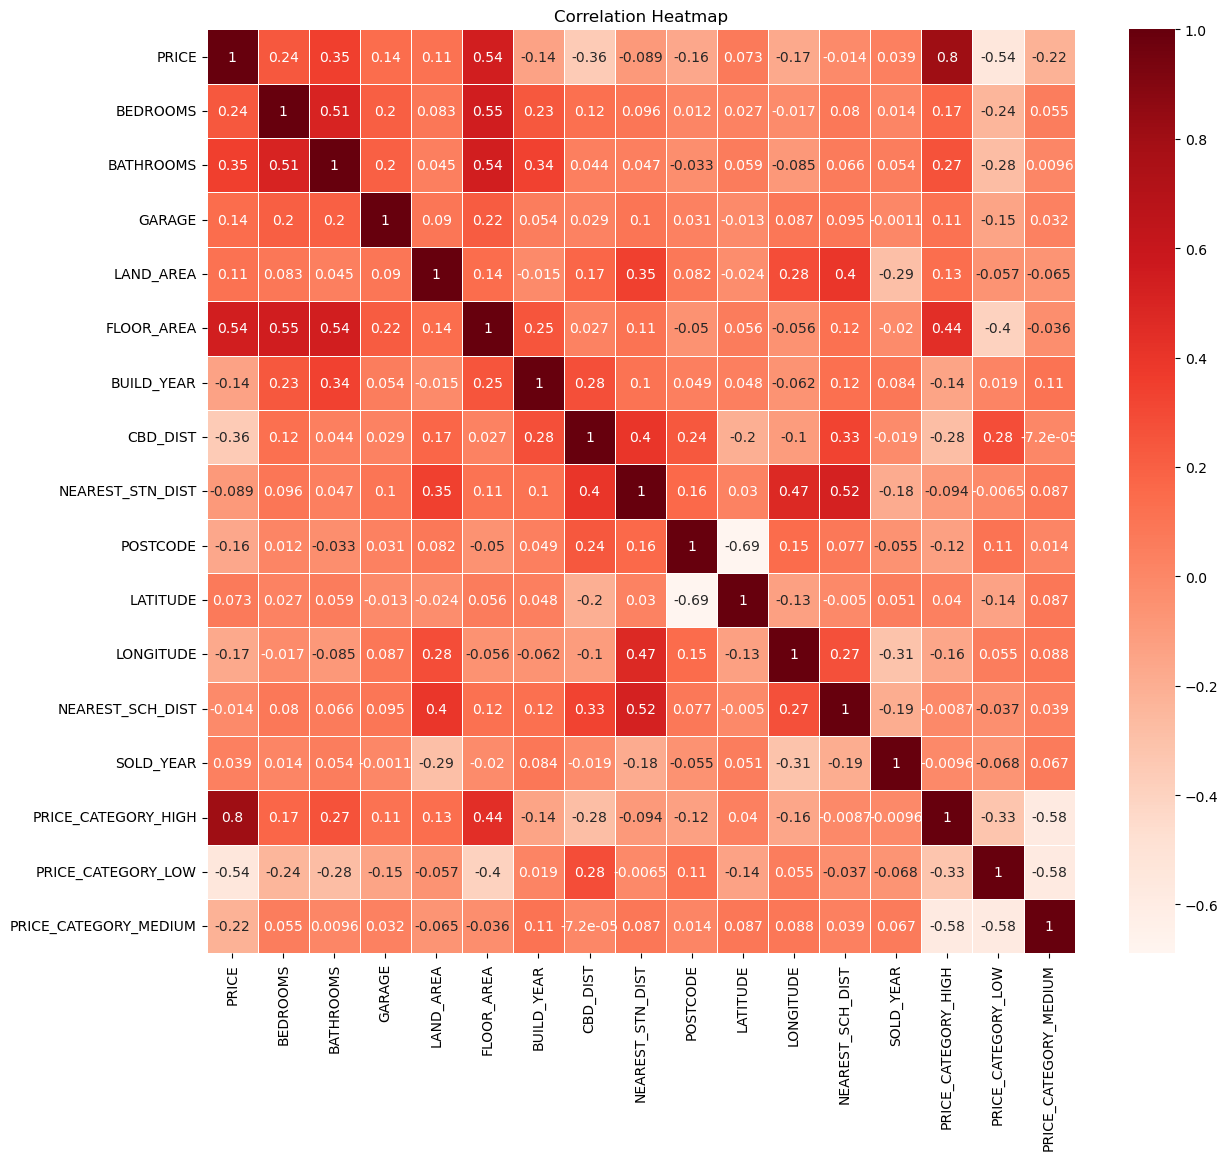

In [54]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(14, 12))

sns.heatmap(correlation_matrix, annot=True, cmap='Reds', linewidths=0.5)

plt.title('Correlation Heatmap')

plt.show()

# Step 4(EDA) - Displaying the Pie Chart for sale of houses from the year 2011 - 2020

In [55]:
year_sales = dataset.groupby('SOLD_YEAR')['SOLD_YEAR'].count()

In [56]:
year_sales = year_sales.tail(10)

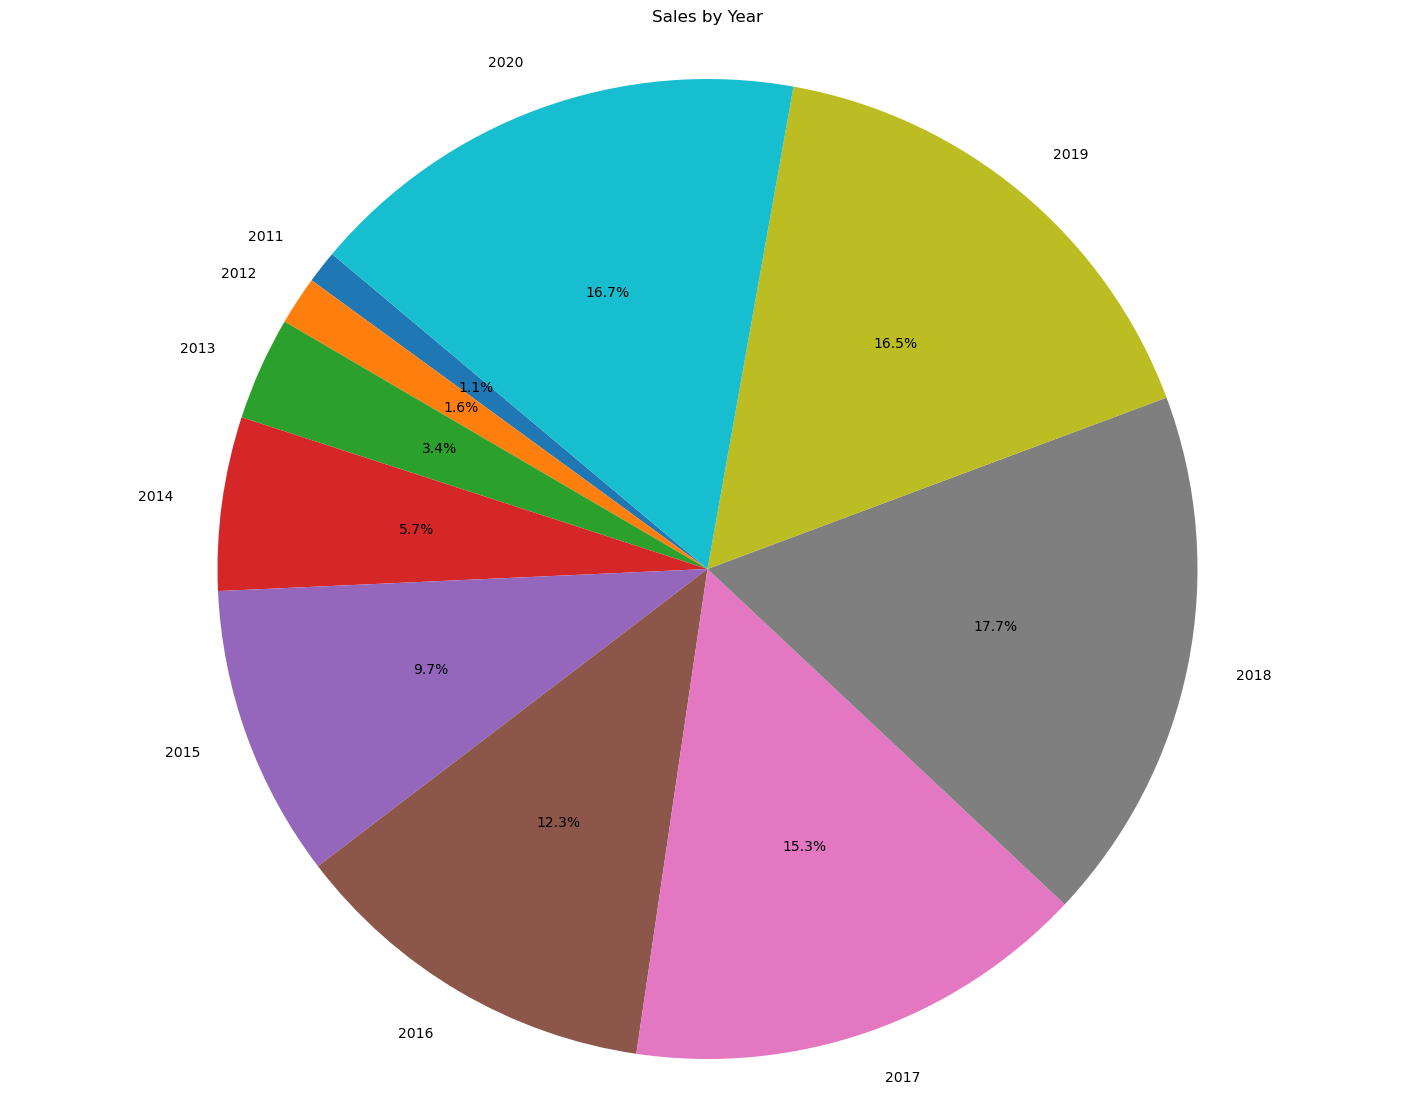

In [57]:
plt.figure(figsize=(18, 14))
plt.pie(year_sales, labels=year_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales by Year')
plt.axis('equal') 
plt.show()

# Step 5(EDA)  - Displaying Box plots for 'PRICE', 'LAND_AREA', 'FLOOR_AREA', 'CBD_DIST', 'NEAREST_STN_DIST', 'NEAREST_SCH_DIST'

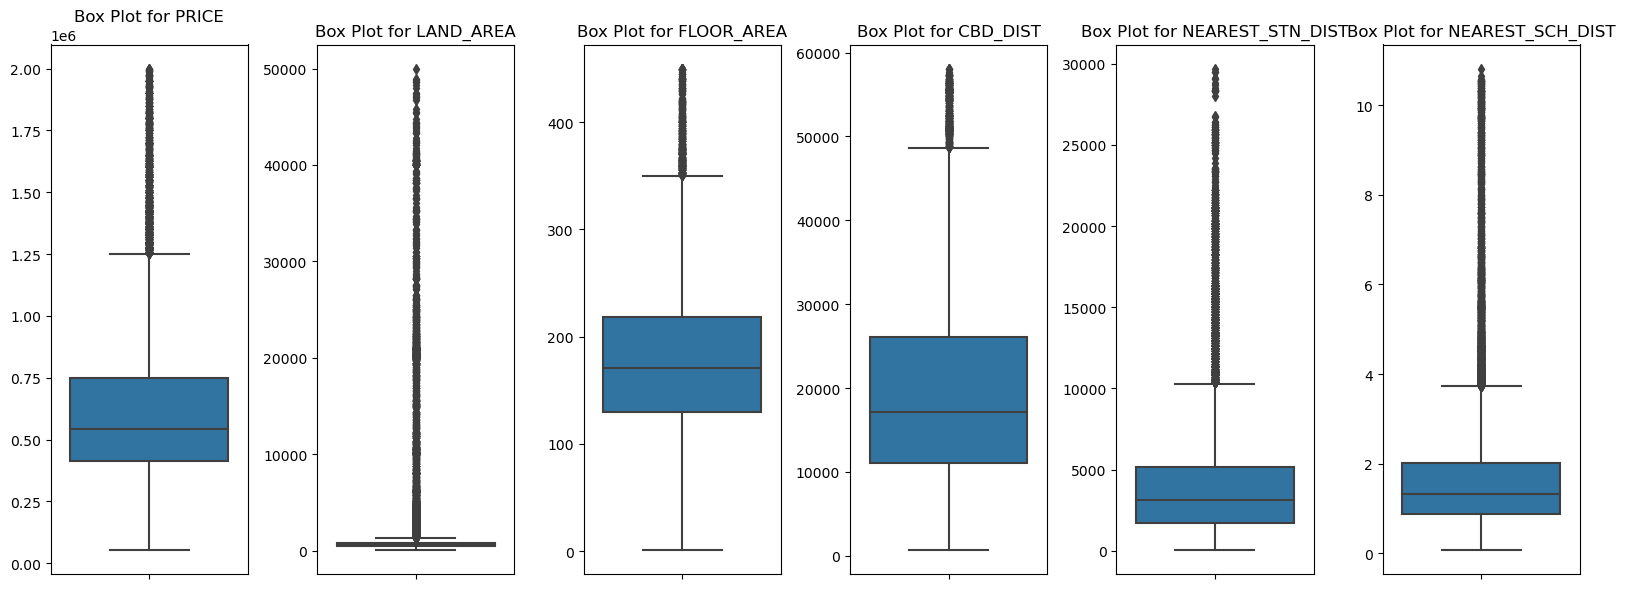

In [58]:
plt.figure(figsize=(16, 6))  


columns_to_plot = ['PRICE', 'LAND_AREA', 'FLOOR_AREA', 'CBD_DIST', 'NEAREST_STN_DIST', 'NEAREST_SCH_DIST']



for i, col in enumerate(columns_to_plot):
    
    plt.subplot(1, len(columns_to_plot), i + 1)
    sns.boxplot(data=dataset, y=col)
    plt.title(f'Box Plot for {col}')
    plt.ylabel('')

plt.tight_layout()

plt.show()

# Step 6(EDA)  - Displaying the Bar chart for price categories

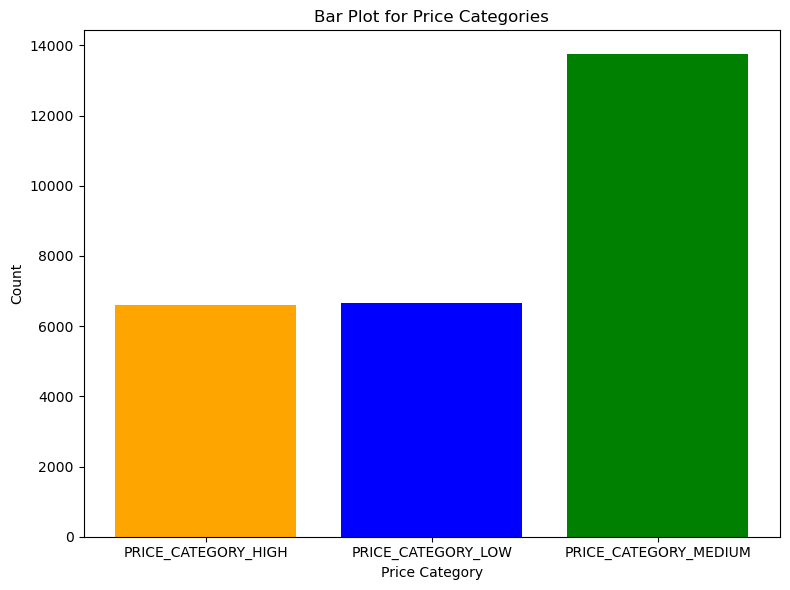

In [59]:
count1 = dataset['PRICE_CATEGORY_HIGH'].sum()
count2 = dataset['PRICE_CATEGORY_LOW'].sum()
count3 = dataset['PRICE_CATEGORY_MEDIUM'].sum()

counts = [count1,count2, count3]
category = ['PRICE_CATEGORY_HIGH','PRICE_CATEGORY_LOW','PRICE_CATEGORY_MEDIUM']
plt.figure(figsize=(8, 6))  
plt.bar(category, counts, color=['orange', 'blue', 'green'])


plt.xlabel('Price Category')
plt.ylabel('Count')
plt.title('Bar Plot for Price Categories')

plt.tight_layout()
plt.show()

# Step 7(EDA)  - Displaying the pair plot for columns 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA','CBD_DIST', 'NEAREST_STN_DIST', 'NEAREST_SCH_DIST'

/Users/yash/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


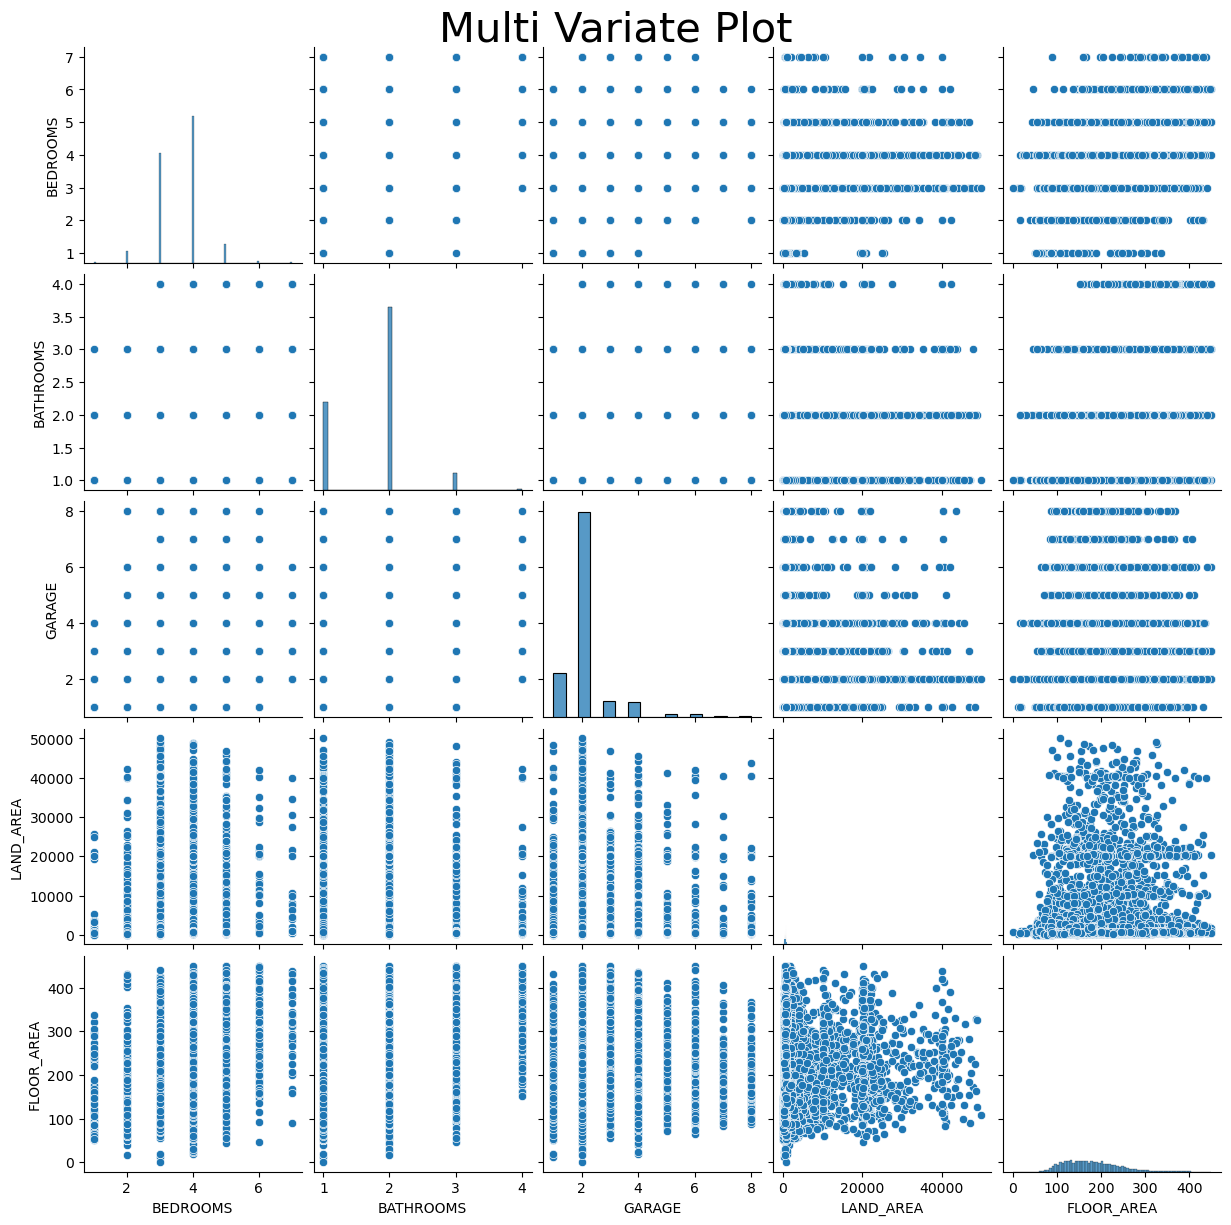

In [60]:
sns.pairplot(dataset[['BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA', 'FLOOR_AREA']])


plt.suptitle('Multi Variate Plot', fontsize = 30)
plt.subplots_adjust(top = 0.95)

plt.show()

# Step 8(EDA)  - Displaying Strip Plot for number of BEDROOMS, BATHROOMS and GARAGE against PRICE

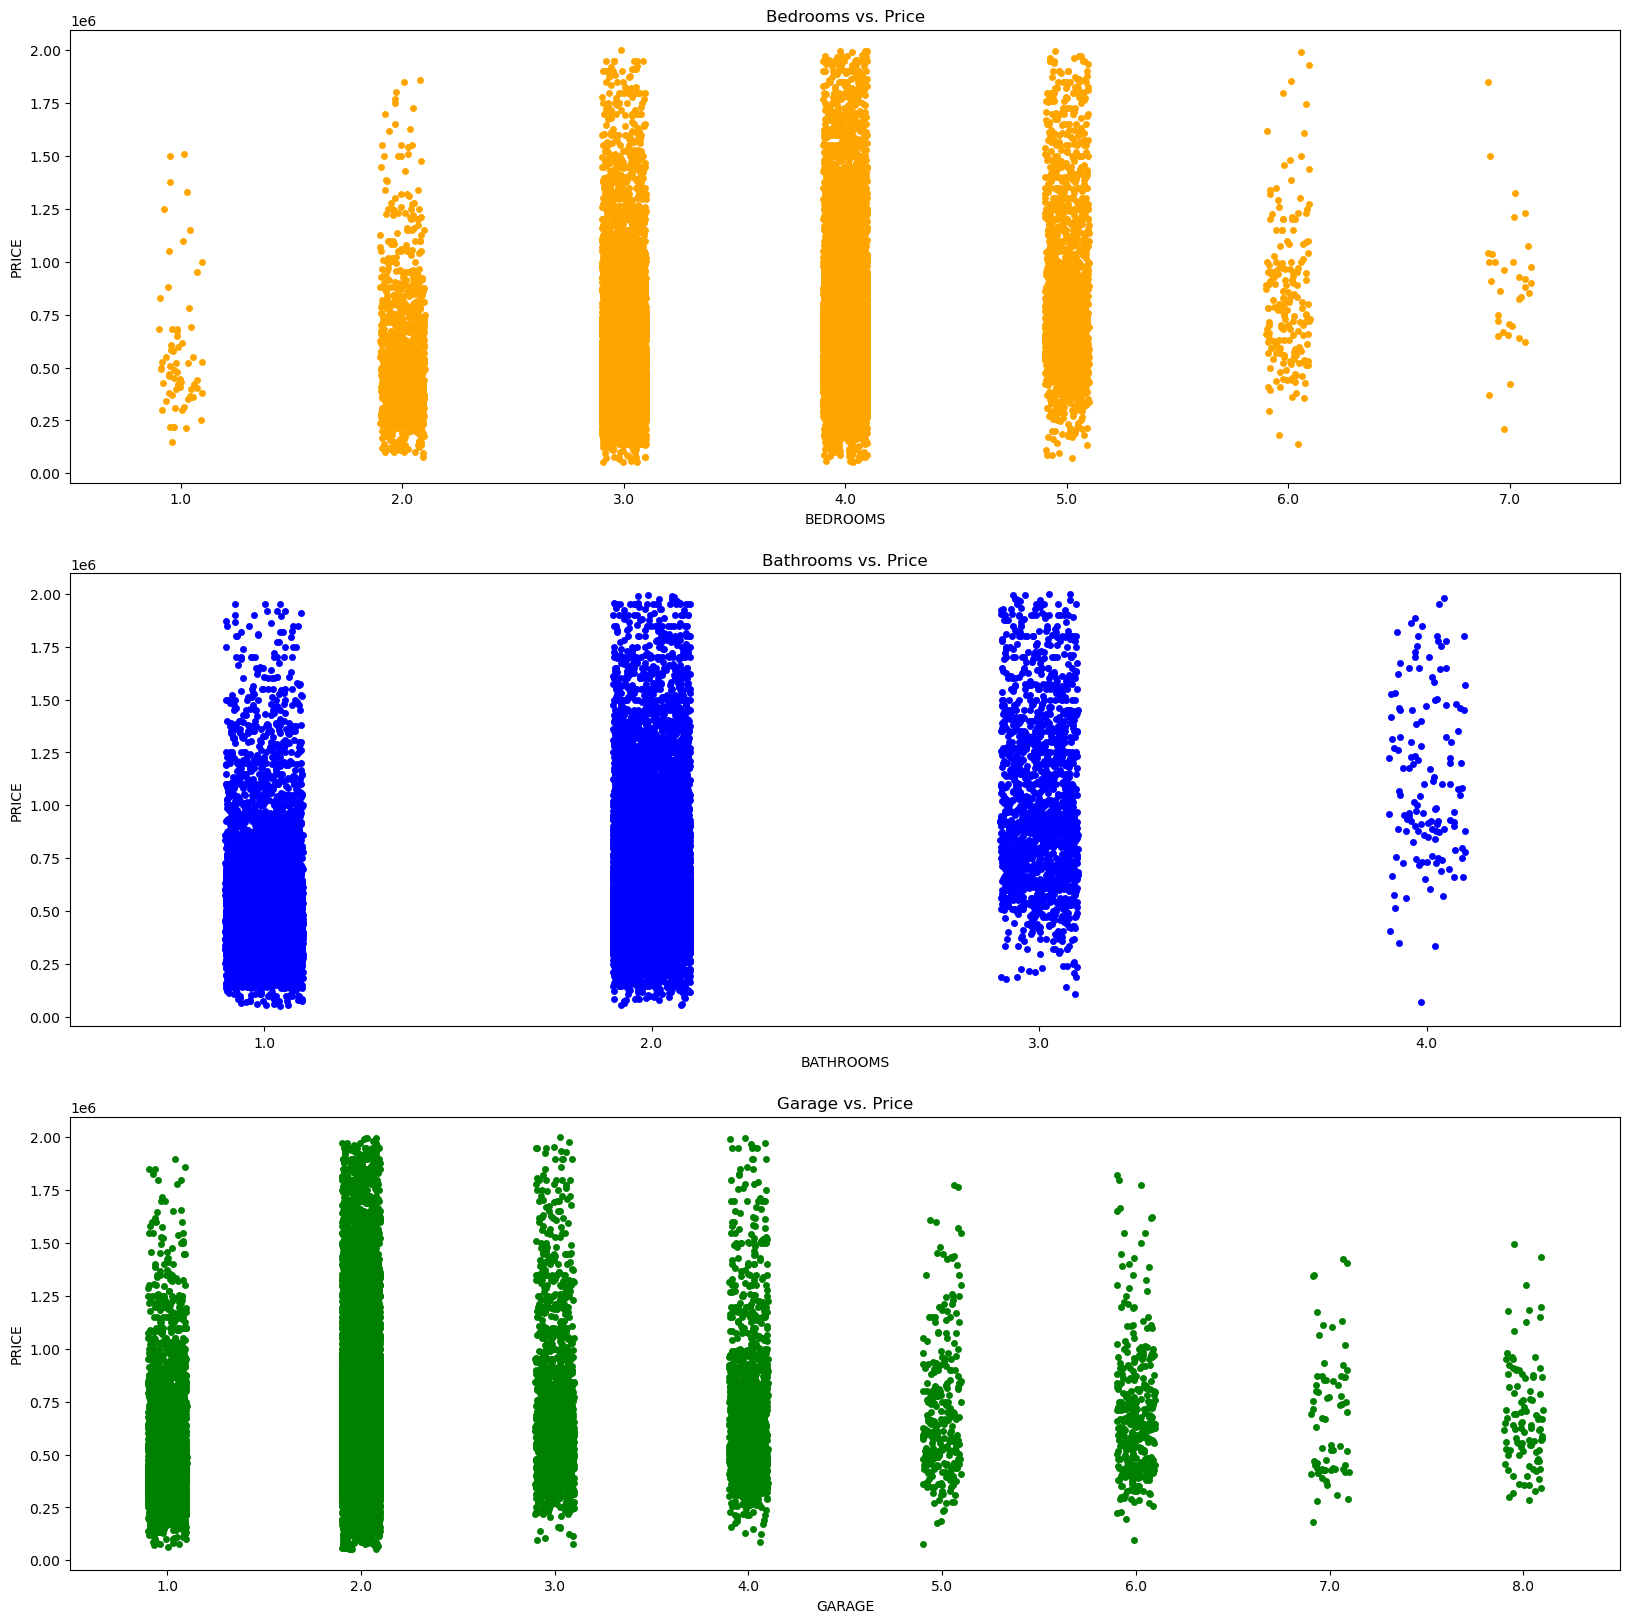

In [61]:
plt.figure(figsize=(20, 20))

plt.subplot(3,1,1)
sns.stripplot(x = 'BEDROOMS', y = 'PRICE', data = dataset, jitter = True, color = 'orange')
plt.title('Bedrooms vs. Price')

plt.subplot(3,1,2)
sns.stripplot(x = 'BATHROOMS', y = 'PRICE', data = dataset, jitter = True, color = 'blue')
plt.title('Bathrooms vs. Price')

plt.subplot(3,1,3)
sns.stripplot(x = 'GARAGE', y = 'PRICE', data = dataset, jitter = True, color = 'green')
plt.title('Garage vs. Price')

plt.show()

# Step 9(EDA)  - Displaying Histogram plot of POSTCODES

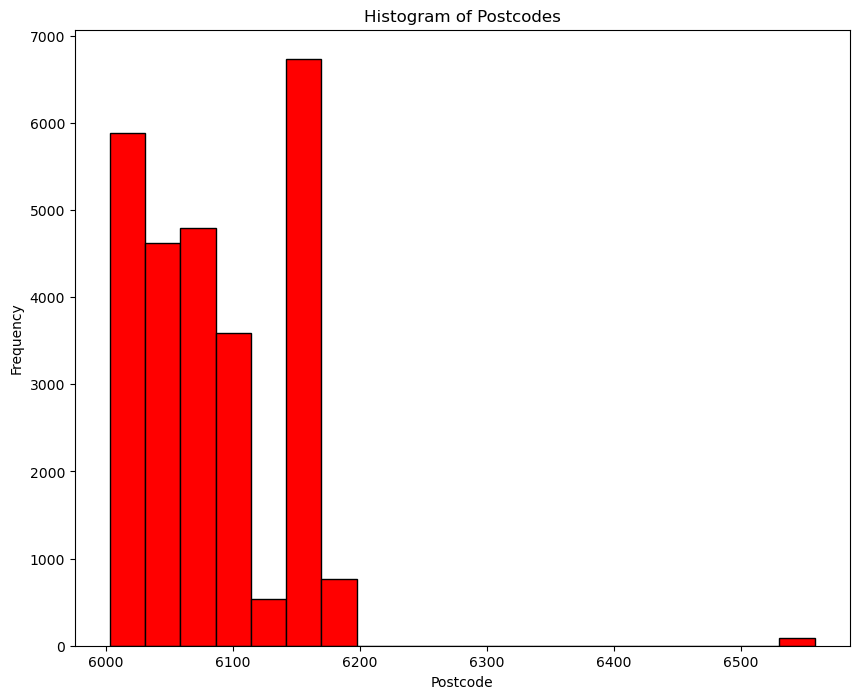

In [62]:
plt.figure(figsize=(10, 8))  

plt.hist(dataset['POSTCODE'], bins=20, color='red', edgecolor='black')

plt.xlabel('Postcode')
plt.ylabel('Frequency')
plt.title('Histogram of Postcodes')


plt.show()

# Step 10(EDA)  - Displaying bar graph based on NEAREST_STN_DIST

In [63]:
bin_distances = [i*4025 for i in range(0, 9)]
dataset["NEAREST_STN_DIST_CATEGORY"] = pd.cut(dataset['NEAREST_STN_DIST'], bins=bin_distances)
result = dataset.groupby("NEAREST_STN_DIST_CATEGORY")[["PRICE_CATEGORY_HIGH","PRICE_CATEGORY_LOW","PRICE_CATEGORY_MEDIUM"]].sum()
result

,PRICE_CATEGORY_HIGH,PRICE_CATEGORY_LOW,PRICE_CATEGORY_MEDIUM
NEAREST_STN_DIST_CATEGORY,,,
"(0, 4025]",4820,4344,7973
"(4025, 8050]",1193,1477,3924
"(8050, 12075]",358,405,944
"(12075, 16100]",167,265,483
"(16100, 20125]",55,104,229
"(20125, 24150]",14,42,136
"(24150, 28175]",2,26,42
"(28175, 32200]",1,2,11


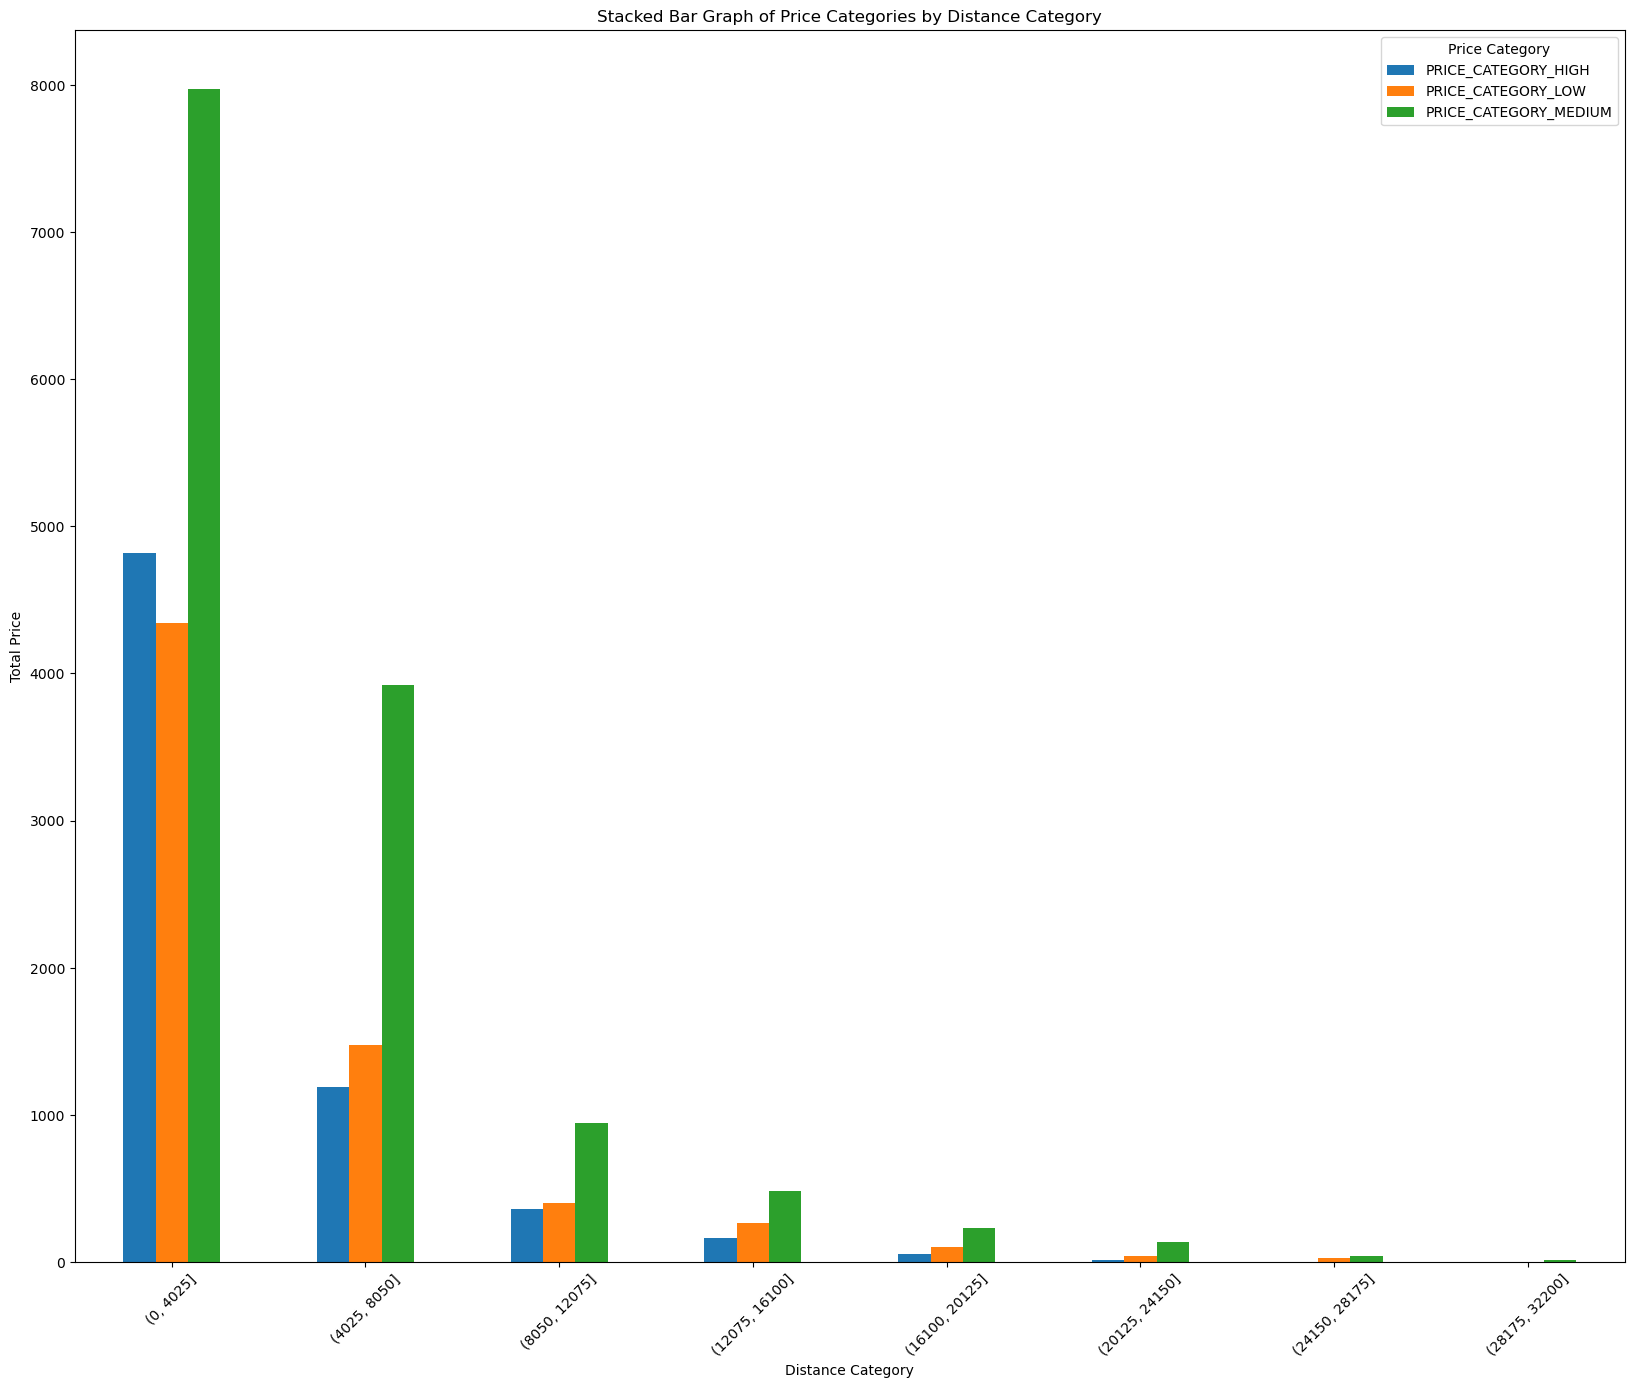

In [64]:
ax = result.plot(kind='bar', figsize=(20, 16))

plt.title('Stacked Bar Graph of Price Categories by Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.legend(title='Price Category')

plt.show()

In [65]:
# Removing extra column added for nearest station distance category
dataset.drop(columns=["NEAREST_STN_DIST_CATEGORY"], inplace=True)
dataset

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR,PRICE_CATEGORY_HIGH,PRICE_CATEGORY_LOW,PRICE_CATEGORY_MEDIUM
2,465000.0,3.0,1.0,2.0,1066.0,154.857143,1976,20800.0,3314.285714,6025,-31.789940,115.749430,1.134980,2016,False,False,True
3,248000.0,3.0,1.0,1.0,699.0,79.000000,1970,37800.0,950.000000,6168,-32.282580,115.765910,1.159382,2009,False,True,False
4,325000.0,4.0,2.0,2.0,564.0,176.857143,2006,14800.0,5500.000000,6065,-31.820450,115.841220,0.982198,2015,False,True,False
6,605000.0,4.0,2.0,2.0,687.0,183.000000,2001,23300.0,2000.000000,6027,-31.754180,115.778820,1.185859,2019,False,False,True
7,1375000.0,4.0,2.0,2.0,475.0,147.000000,1958,8400.0,2300.000000,6153,-32.026430,115.842360,0.759846,2016,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34649,575000.0,3.0,2.0,2.0,2001.0,178.000000,1995,27400.0,13400.000000,6072,-31.900350,116.142070,3.611917,2011,False,False,True
34651,345000.0,3.0,2.0,1.0,300.0,117.000000,2010,28600.0,6100.000000,6031,-31.700286,115.801334,0.483366,2017,False,True,False
34652,575000.0,3.0,1.0,1.0,765.0,147.000000,1981,7000.0,1900.000000,6102,-32.001890,115.904800,1.108131,2018,False,False,True
34653,680000.0,4.0,2.0,1.0,721.0,200.000000,1971,13100.0,745.000000,6024,-31.844430,115.804220,1.237553,2015,False,False,True


# Step 11(EDA)  - Line graph to display the trend of houses built and sold over years

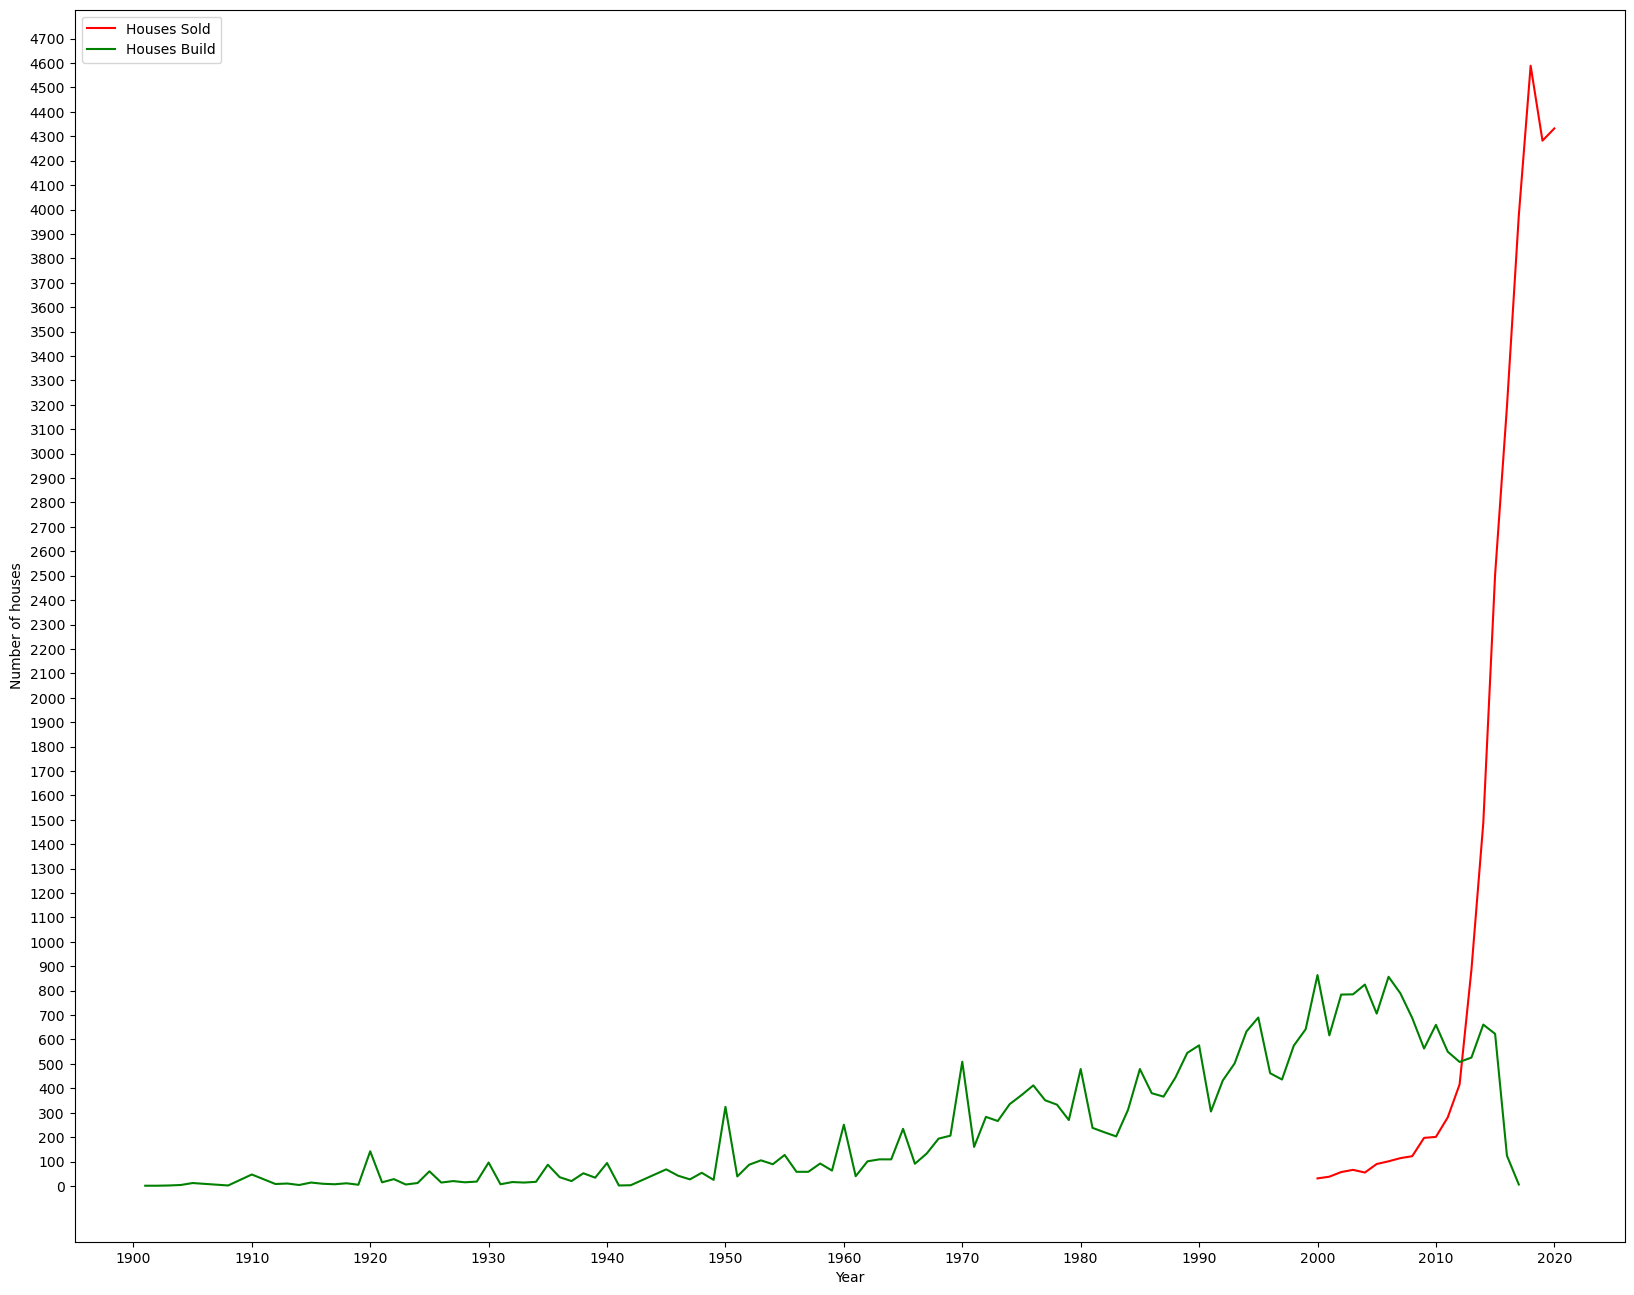

In [66]:
plt.figure(figsize=(20, 16))
sold_year_grouped_dataset = dataset.groupby(['SOLD_YEAR'], sort=True)["SOLD_YEAR"].count()
build_year_grouped_dataset = dataset.groupby(['BUILD_YEAR'], sort=True)["BUILD_YEAR"].count()
plt.plot(sold_year_grouped_dataset, color="red", label="Houses Sold")
plt.plot(build_year_grouped_dataset, color="green", label="Houses Build")
plt.xlabel("Year")
plt.ylabel("Number of houses")
plt.xticks(range(1900,2023,10))
plt.yticks(range(0,4800,100))
plt.legend(loc="upper left")
plt.show()

# Step 11(Cleaning) - Normalizing data for few columns

In [67]:
# normalization_column = ["PRICE", "BEDROOMS", "BATHROOMS", "GARAGE", "LAND_AREA", "FLOOR_AREA", "CBD_DIST", "NEAREST_STN_DIST", "NEAREST_SCH_DIST"]
# scaler = MinMaxScaler()
# scaler.fit(dataset[normalization_column])
# normalized_data = scaler.transform(dataset[normalization_column])
# dataset[normalization_column] = normalized_data
# pickle.dump(scaler, open("scaler.pkl", "wb"))
# dataset[normalization_column]

# Final statistics of the cleaned dataset

In [68]:
dataset.describe()

,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,SOLD_YEAR
count,2.701700e+04,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000,27017.000000
mean,6.237420e+05,3.614280,1.766147,2.128253,1766.162950,179.746266,1990.083429,19472.534959,4270.415786,6088.717067,-31.960321,115.876569,1.678757,2016.820002
std,3.129853e+05,0.721754,0.573400,0.948570,4629.689786,64.650002,20.274130,11163.125818,4004.758570,59.846854,0.175431,0.115668,1.361687,3.003870
min,5.300000e+04,1.000000,1.000000,1.000000,61.000000,1.000000,1901.000000,681.000000,46.000000,6003.000000,-32.455550,115.583610,0.070912,2000.000000
25%,4.150000e+05,3.000000,1.000000,2.000000,510.000000,130.000000,1979.000000,11100.000000,1700.000000,6038.000000,-32.067380,115.789050,0.866417,2016.000000
50%,5.430000e+05,4.000000,2.000000,2.000000,684.000000,171.000000,1995.000000,17200.000000,3100.000000,6069.000000,-31.933030,115.851990,1.313455,2017.000000
75%,7.500000e+05,4.000000,2.000000,2.000000,845.000000,218.000000,2005.000000,26100.000000,5157.142857,6150.000000,-31.844300,115.965115,2.012603,2019.000000
max,1.999990e+06,7.000000,4.000000,8.000000,50000.000000,450.000000,2017.000000,58100.000000,29700.000000,6558.000000,-31.465818,116.298804,10.819908,2020.000000


In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27017 entries, 2 to 34654
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   PRICE                  27017 non-null  float64
 1   BEDROOMS               27017 non-null  float64
 2   BATHROOMS              27017 non-null  float64
 3   GARAGE                 27017 non-null  float64
 4   LAND_AREA              27017 non-null  float64
 5   FLOOR_AREA             27017 non-null  float64
 6   BUILD_YEAR             27017 non-null  int64  
 7   CBD_DIST               27017 non-null  float64
 8   NEAREST_STN_DIST       27017 non-null  float64
 9   POSTCODE               27017 non-null  int64  
 10  LATITUDE               27017 non-null  float64
 11  LONGITUDE              27017 non-null  float64
 12  NEAREST_SCH_DIST       27017 non-null  float64
 13  SOLD_YEAR              27017 non-null  int32  
 14  PRICE_CATEGORY_HIGH    27017 non-null  bool   
 15  PRICE_C

In [70]:
dataset.shape

(27017, 17)

# Saving the clean dataset

In [71]:
dataset.to_csv('cleaned_dataset.csv')
print("Saved !")

Saved !
